# **Projet 5 - Segmentez des clients d'un site e-commerce : Notebook essais**

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Feature engineering 1](#toc3_)    
  - 3.1. [Création des données](#toc3_1_)    
  - 3.2. [KMeans](#toc3_2_)    
  - 3.3. [AgglomerativeClustering](#toc3_3_)    
  - 3.4. [DBSCAN](#toc3_4_)    
  - 3.5. [Enregistrement des modèles](#toc3_5_)    
  - 3.6. [Résultats](#toc3_6_)    
    - 3.6.1. [Comparaisons des modèles](#toc3_6_1_)    
    - 3.6.2. [Visualisation des clusters](#toc3_6_2_)    
    - 3.6.3. [Visualisation de la répartition des clusters](#toc3_6_3_)    
  - 3.7. [Suppression des données](#toc3_7_)    
- 4. [Feature engineering 2](#toc4_)    
  - 4.1. [Création des données](#toc4_1_)    
  - 4.2. [KMeans](#toc4_2_)    
  - 4.3. [AgglomerativeClustering](#toc4_3_)    
  - 4.4. [DBSCAN](#toc4_4_)    
  - 4.5. [Enregistrement des modèles](#toc4_5_)    
  - 4.6. [Résultats](#toc4_6_)    
    - 4.6.1. [Comparaisons des modèles](#toc4_6_1_)    
    - 4.6.2. [Visualisation des clusters](#toc4_6_2_)    
    - 4.6.3. [Visualisation de la répartition des clusters](#toc4_6_3_)    
  - 4.7. [Suppression des données](#toc4_7_)    
- 5. [Feature engineering 3](#toc5_)    
  - 5.1. [Création des données](#toc5_1_)    
  - 5.2. [KMeans](#toc5_2_)    
  - 5.3. [Enregistrement des modèles](#toc5_3_)    
  - 5.4. [Résultats](#toc5_4_)    
    - 5.4.1. [Comparaisons des modèles](#toc5_4_1_)    
    - 5.4.2. [Visualisation des clusters](#toc5_4_2_)    
  - 5.5. [Visualisation de la répartition des clusters](#toc5_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.  
Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.  
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.  

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

1. Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.  
La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

2. Une fois le modèle de segmentation choisi, nous souhaiterions que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

### 1.3. <a id='toc1_3_'></a>[Objectif du notebook](#toc0_)

Dans ce Notebook nous verrons : 
- l'entrainement des modèles sur chaque feature engineering
- la comparaison et la sélection de la meilleure combinaison modèle/feature engineering. 

## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [2]:
# Importation des librairies : 
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pickle

from sklearn.compose import make_column_selector

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import fct_projet_5

In [4]:
# Création des chemins de dossier : 
dossier_donnees = '1. Données'
dossier_sauvegarde = '2. Sauvegardes'

## 3. <a id='toc3_'></a>[Feature engineering 1](#toc0_)
Utilisation de data_RFMS uniquement avec les variables premettant de répondre aux principe RFM + S en marketing. 

### 3.1. <a id='toc3_1_'></a>[Création des données](#toc0_)

In [5]:
# Importation des données : 

name = 'data_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    data_RFMS = pickle.load(fichier)
    
del name, chemin_fichier

In [6]:
# Visualisation : 
print('Variables de data_RFMS :\n')
for col in data_RFMS.columns:
    print(f"\t- {col}")
    
print('\n'+'--'*50+'\n')

print(f"Dimenssions de data_RFMS : {data_RFMS.shape}")

print('\n'+'--'*50+'\n')

print('Type de données de data_RFMS :\n')
print(data_RFMS.dtypes)

del col

Variables de data_RFMS :

	- customer_unique_id
	- recence
	- frequence
	- montant
	- satisfaction

----------------------------------------------------------------------------------------------------

Dimenssions de data_RFMS : (96093, 5)

----------------------------------------------------------------------------------------------------

Type de données de data_RFMS :

customer_unique_id     object
recence                 int64
frequence               int64
montant               float64
satisfaction            int64
dtype: object


In [7]:
# Création de X pour le clustering : 
data_RFMS = data_RFMS.set_index('customer_unique_id')

X = fct_projet_5.transformation_df(df=data_RFMS)

In [8]:
# Création du dictionnaire de résultats des modèles : 
models_RFMS = {
    'KMeans' : {'model' : KMeans()},
    'AC' :{'model' : AgglomerativeClustering()},
    'DBSCAN' : {'model': DBSCAN()} 
}

### 3.2. <a id='toc3_2_'></a>[KMeans](#toc0_)

/Users/maxime/Library/Caches/pypoetry/virtualenvs/projet_5_ocr-hEjY7FwX-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/Library/Caches/pypoetry/virtualenvs/projet_5_ocr-hEjY7FwX-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/Library/Caches/pypoetry/virtualenvs/projet_5_ocr-hEjY7FwX-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

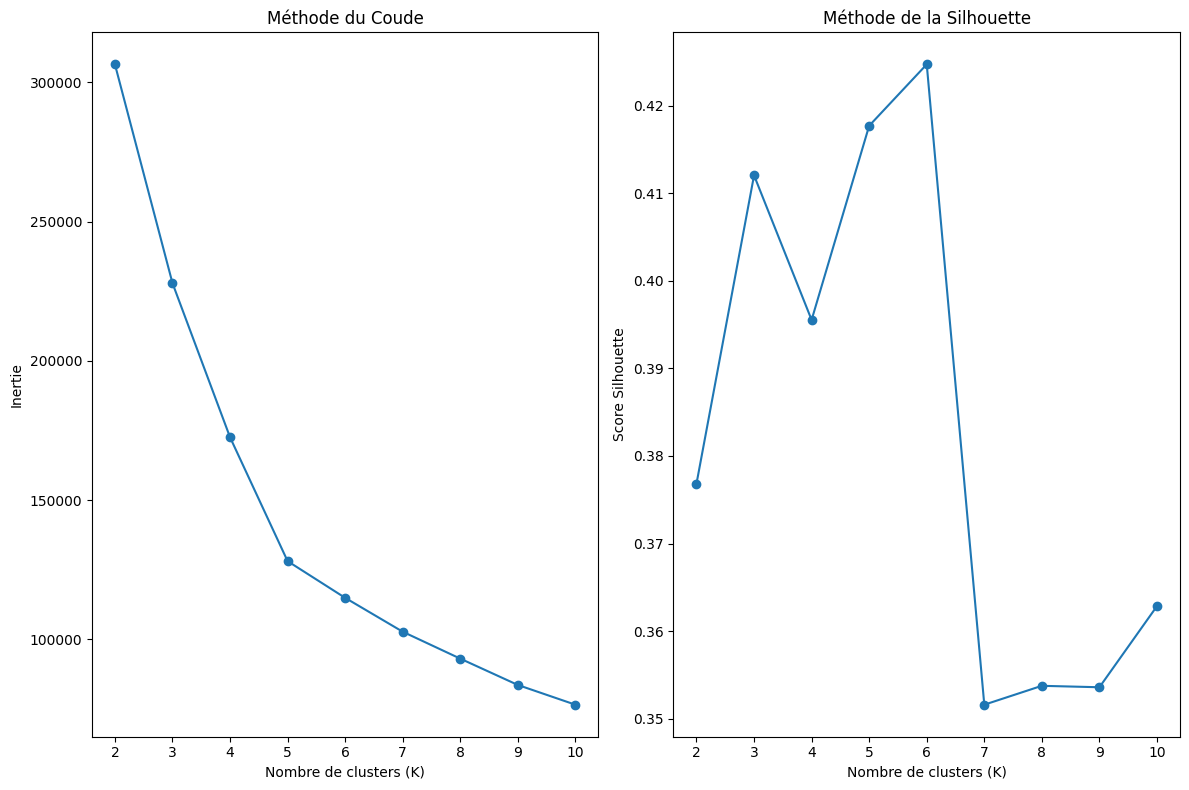

In [9]:
# Recherche du meilleur nombre de clusters : 
fct_projet_5.best_k_KMeans(data=X)

Ici les deux méthodes nous donne un nombre de clusters différents mais proche (5 ou 6). 

Choix de K = 5 :
- Minimise le nombre de clusters pour la segmentation marketing. 
- Résultat pour la silhouette impoortant pour ce nombre de clusters. 

In [13]:
# Calculs des métriques pour le modèle : 
params={'n_clusters' : 5, 'random_state' : 42}

models_RFMS = fct_projet_5.performances_modèle(
    dico=models_RFMS,
    model="KMeans",
    params=params,
    data=X,
)

del params

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

### 3.3. <a id='toc3_3_'></a>[AgglomerativeClustering](#toc0_)
AgglomerativeClustering étant un modèle prenant beacoup de ressource, son optimisation sera réalisée sur un échantillonnage aléatoire de X 

In [31]:
# Echantillonnage aléatoire de X :

random_indices = np.random.choice(range(len(X)), size=len(X)//2, replace=False)
X_sampled = X.iloc[random_indices]

del random_indices

print(f"Taille de X_sampled : {X_sampled.shape} ")
print(f"Taille initial de X : {X.shape}")

Taille de X_sampled : (48046, 4) 
Taille initial de X : (96093, 4)


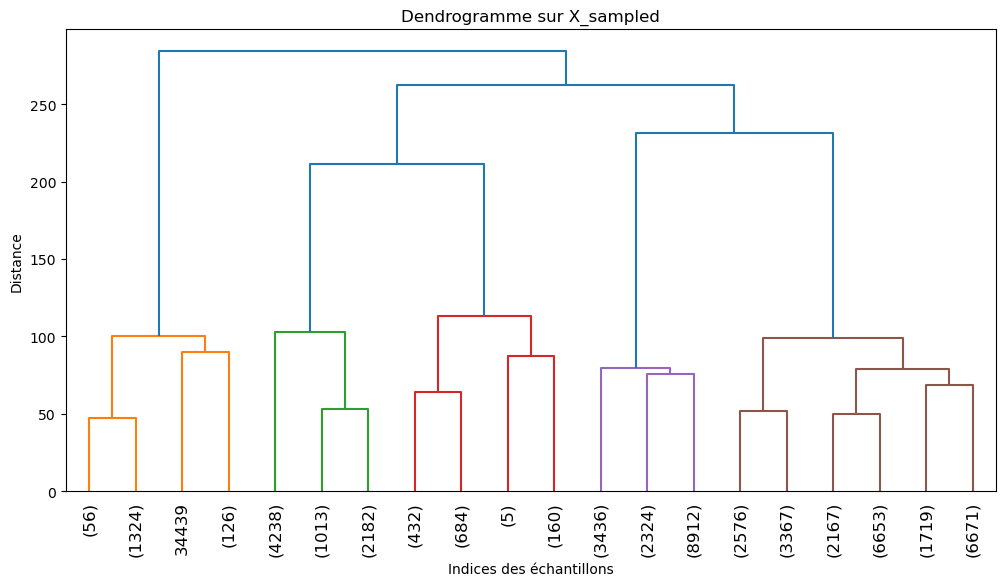

In [15]:
# Recherche du nombre de clusters : 
fct_projet_5.dendrogramme_AC(data=X_sampled)

En observant le dendrogramme si dessus, un nombre de clusters de 5 est choisit pour le modèle AgglomerativeClustering.

In [16]:
# Calcul des métriques pour le modèle : 
params={'n_clusters' : 5}

models_RFMS = fct_projet_5.performances_modèle(
    dico=models_RFMS,
    model="AC",
    params=params,
    data=X_sampled)

del params

### 3.4. <a id='toc3_4_'></a>[DBSCAN](#toc0_)

In [17]:
# Test primaire du modèle : 
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)

print(f"Le modèle DBSCAN sans optimisation trouve {len(np.unique(labels)) - 1} clusters.")

print(f"\nNombre de clients par clusters :\n")
for x in np.unique(labels): 
    print(f" Clusters {x} --> {len([y for y in labels if y == x])} clients")

print(f"Hyperparamètres par défaut : eps=0.5, min_samples=5")

del dbscan, labels

Le modèle DBSCAN sans optimisation trouve 30 clusters.

Nombre de clients par clusters :

 Clusters -1 --> 380 clients
 Clusters 0 --> 53014 clients
 Clusters 1 --> 18559 clients
 Clusters 2 --> 7573 clients
 Clusters 3 --> 10494 clients
 Clusters 4 --> 2903 clients
 Clusters 5 --> 831 clients
 Clusters 6 --> 47 clients
 Clusters 7 --> 1236 clients
 Clusters 8 --> 269 clients
 Clusters 9 --> 83 clients
 Clusters 10 --> 187 clients
 Clusters 11 --> 12 clients
 Clusters 12 --> 12 clients
 Clusters 13 --> 89 clients
 Clusters 14 --> 6 clients
 Clusters 15 --> 139 clients
 Clusters 16 --> 33 clients
 Clusters 17 --> 21 clients
 Clusters 18 --> 120 clients
 Clusters 19 --> 7 clients
 Clusters 20 --> 15 clients
 Clusters 21 --> 8 clients
 Clusters 22 --> 9 clients
 Clusters 23 --> 8 clients
 Clusters 24 --> 5 clients
 Clusters 25 --> 7 clients
 Clusters 26 --> 4 clients
 Clusters 27 --> 6 clients
 Clusters 28 --> 10 clients
 Clusters 29 --> 6 clients
Hyperparamètres par défaut : eps=0.5, min

Par défaut, DBSCAN nous donne un nombre de clusters beaucoup trop important. 

De plus, beacoup de clusters sont trop petits. 

--> Augmentation de eps et min_samples pour augmenter la taille des clusters.

In [18]:
# Recherche des meilleurs paramètres de DBSCAN : 
fct_projet_5.best_params_DBSCAN(data=X,
                   eps_range=[1, 1.3, 1.5],
                   min_samples_range=[5, 6, 7]) 

,Eps,Min_samples,Nbre_clusters,Nbre_outliers,Taille_moy_clusters,Davies_Bouldin_score
0,1.0,5,6,100,15998.833333,1.229297
1,1.0,6,6,107,15997.666667,1.222519
2,1.0,7,5,122,19194.200000,1.210245
3,1.3,5,7,61,13718.857143,1.217567
4,1.3,6,5,76,19203.400000,1.237751
5,1.3,7,4,84,24002.250000,1.197702
6,1.5,5,6,47,16007.666667,1.103372
7,1.5,6,6,55,16006.333333,1.214615
8,1.5,7,4,74,24004.750000,1.218712


Les paramètres eps = 1.5 et min_samples = 5, semblent être un bon compromis

In [19]:
# Calculs des métriques pour le modèle :

params={'eps' : 1.5, 'min_samples' : 5}

models_RFMS = fct_projet_5.performances_modèle(
    dico=models_RFMS,
    model="DBSCAN",
    params=params,
    data=X,
)

del params

### 3.5. <a id='toc3_5_'></a>[Enregistrement des modèles](#toc0_)

In [20]:
# Enregistrement du dictionnaire models_RFMS : 

name = 'models_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(models_RFMS, f)
    
del name, chemin_fichier

### 3.6. <a id='toc3_6_'></a>[Résultats](#toc0_)
#### 3.6.1. <a id='toc3_6_1_'></a>[Comparaisons des modèles](#toc0_)

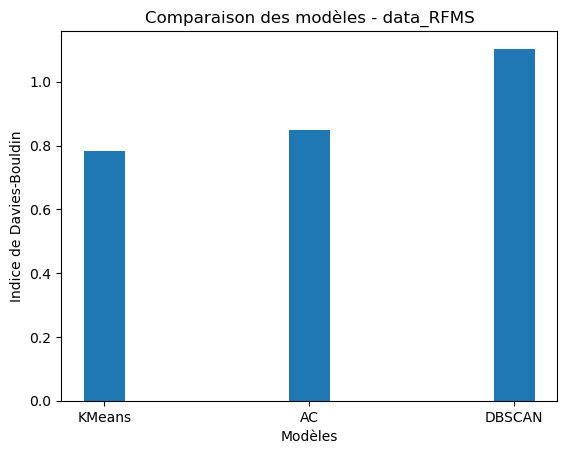

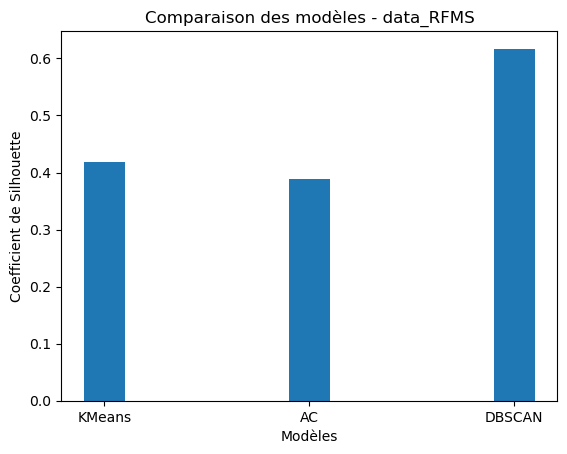

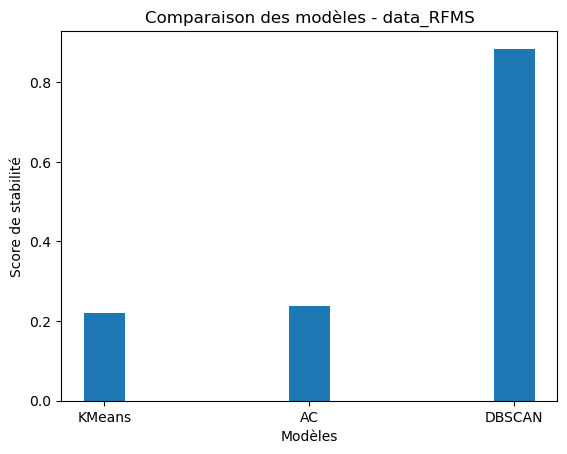

In [21]:
# Comparaison des modèles : 

# Création des données : 

ls_db = []
ls_silhouette = []
ls_stabilite = []
ls_name = []

for key in models_RFMS.keys():
    ls_name.append(key)
    ls_db.append(models_RFMS[key]['Davies-Bouldin'])
    ls_silhouette.append(models_RFMS[key]['Silhouette'])
    ls_stabilite.append(models_RFMS[key]['Score stabilité'])

width = 0.2

# Graph 1 - Indice Davies-Bouldin : 

plt.figure()
plt.bar(x=ls_name, height=ls_db, width=width)
plt.xlabel('Modèles')
plt.ylabel('Indice de Davies-Bouldin')
plt.title('Comparaison des modèles - data_RFMS')
plt.show()

# Graph 2 - Silhouette : 

plt.figure()
plt.bar(x=ls_name, height=ls_silhouette, width=width)
plt.xlabel('Modèles')
plt.ylabel('Coefficient de Silhouette')
plt.title('Comparaison des modèles - data_RFMS')
plt.show()

# Graph 3 - Score Stabilité : 

plt.figure()
plt.bar(x=ls_name, height=ls_stabilite, width=width)
plt.xlabel('Modèles')
plt.ylabel('Score de stabilité')
plt.title('Comparaison des modèles - data_RFMS')
plt.show()

del ls_db, ls_name, ls_silhouette, ls_stabilite, key

Au vu de ces résultats, le modèles DBSCAN semble meilleur que les autres modèles : 
- Meilleure stabilité des clusters --> clusters stables et robustes aux variations de l'ensemble de données.
- Meilleur coefficient de silhouette --> les objets sont bien regroupés dans leur cluster et les clusters sont bien séparés.
- Moins bon indice de Davies-Bouldin (mais résultat très correct) --> séparation des clusters.

#### 3.6.2. <a id='toc3_6_2_'></a>[Visualisation des clusters](#toc0_)

In [32]:
# Création des labels pour chaque modèle : 

for key in models_RFMS.keys():
    if key == 'AC':
        data_RFMS[key+'_labels'] = fct_projet_5.clustersing_with_AC(sample=X_sampled, data_full=X, key=key, dico=models_RFMS)
    else: 
        data_RFMS[key+'_labels'] = models_RFMS[key]['model'].fit_predict(X)

del key

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Les deux composantes obtenues par la méthode PCA permettent d'expliquer 54.2123 % de la variance du datasets.


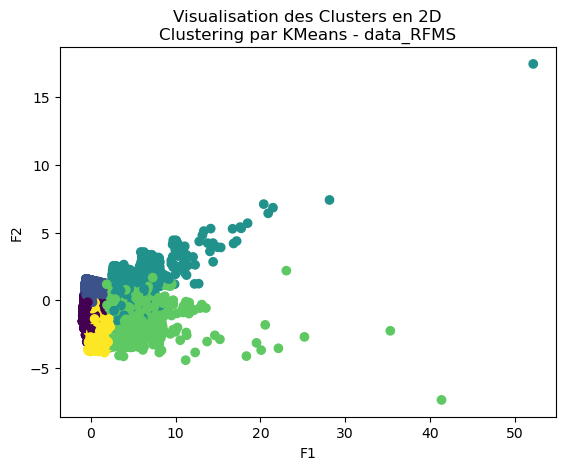

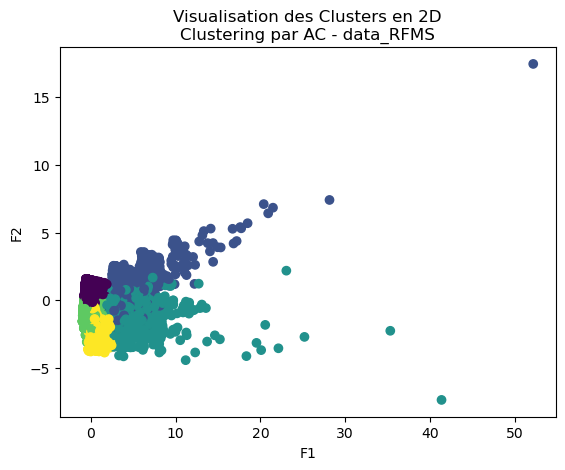

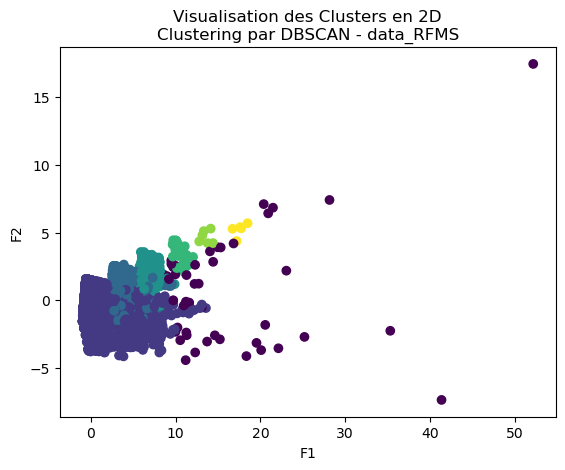

In [33]:
# Visualisation des clusters en 2 dimmensions (projection PCA): 

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=2)
data_RFMS_pca = X.copy()
data_RFMS_pca = pca.fit_transform(data_RFMS_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les deux composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")

for key in models_RFMS.keys():
    plt.figure()
    plt.scatter(data_RFMS_pca[:, 0], data_RFMS_pca[:, 1], c=data_RFMS[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_RFMS')
    plt.show()
    
del pca, data_RFMS_pca, explained_variance, key

Les trois composantes obtenues par la méthode PCA permettent d'expliquer 78.4015 % de la variance du datasets.


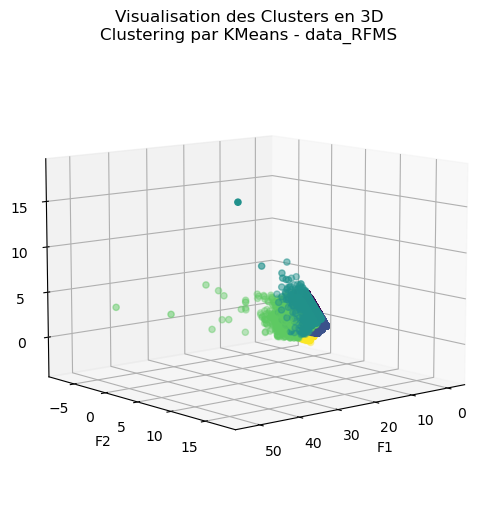

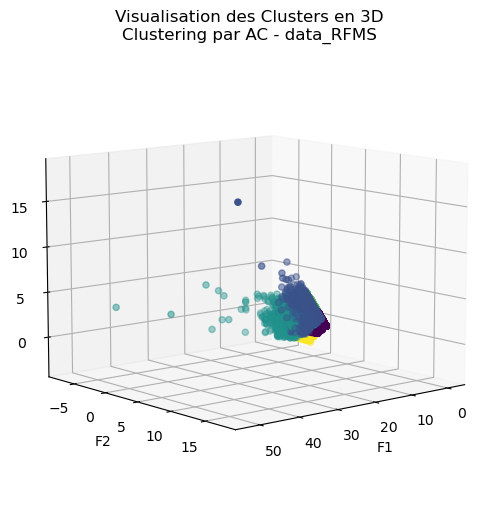

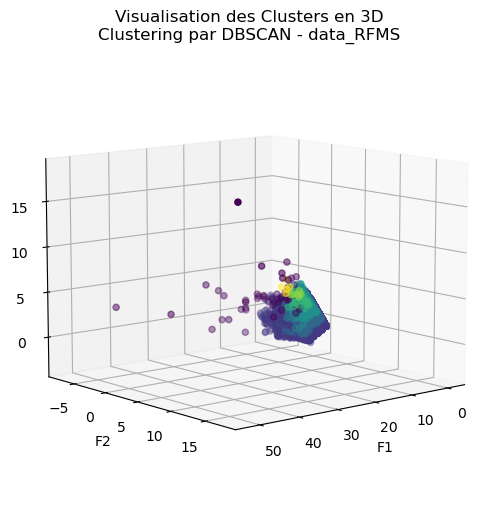

In [34]:
# Visualisation des clusters en 3 dimmensions (projection PCA): 

# %matplotlib notebook

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=3)
data_RFMS_pca = X.copy()
data_RFMS_pca = pca.fit_transform(data_RFMS_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les trois composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")



for key in models_RFMS.keys():
    
    fig = plt.figure(figsize=(10, 6))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_RFMS_pca[:, 0], data_RFMS_pca[:, 1], data_RFMS_pca[:, 2], c=data_RFMS[key+'_labels'])

    ax.set_xlabel('F1')
    ax.set_ylabel('F2')
    ax.set_zlabel('F3')
    plt.title('Visualisation des Clusters en 3D\n'
              f'Clustering par {key} - data_RFMS')
    ax.view_init(azim=50, elev=10)
    
    plt.show()
    

# %matplotlib inline

del pca, data_RFMS_pca, explained_variance, key

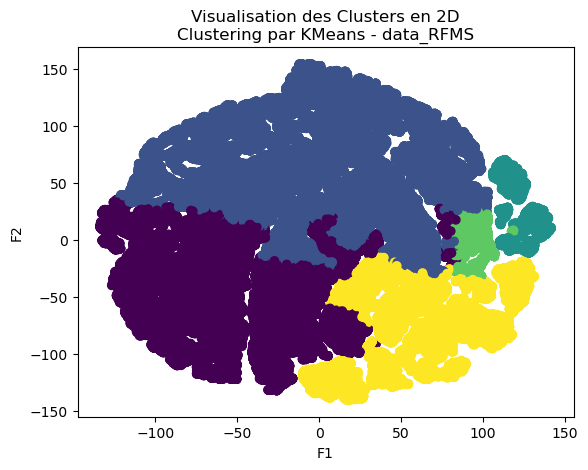

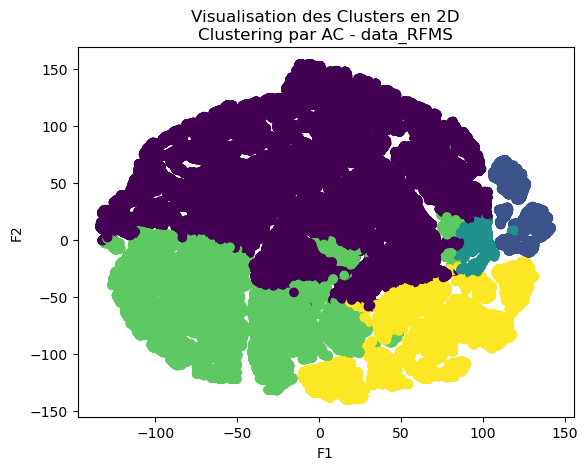

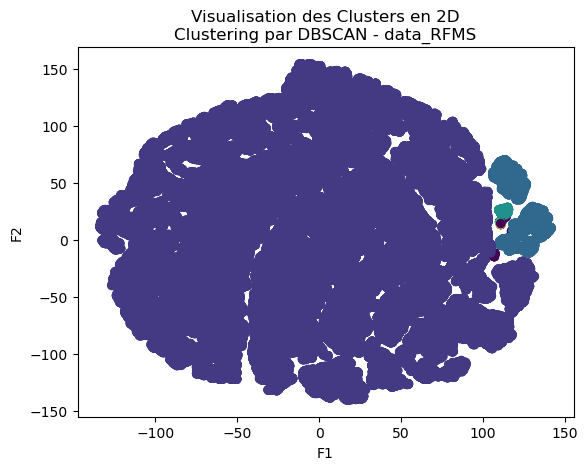

In [35]:
# Visualisation des clusters en 2 dimmensions (projection t-SNE): 

# Création d'un data_RFMS_tsne avec 2 composantes : 
tsne = TSNE(n_components=2, random_state=42)
data_RFMS_tsne = X.copy()
data_RFMS_tsne = tsne.fit_transform(data_RFMS_tsne)


# Vous pouvez également ajouter d'autres informations à tsne_df si nécessaire, comme des étiquettes, des identifiants, etc.

for key in models_RFMS.keys():
    plt.figure()
    plt.scatter(data_RFMS_tsne[:, 0], data_RFMS_tsne[:, 1], c=data_RFMS[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_RFMS')
    plt.show()
    
del tsne, data_RFMS_tsne, key

#### 3.6.3. <a id='toc3_6_3_'></a>[Visualisation de la répartition des clusters](#toc0_)

In [26]:
# Satistiques descriptives : 

dico = {}


for col in data_RFMS.iloc[:, 1:5].columns:
    dico[col] = ['mean', 'std', 'median']


cluster_stats = {}   
    
for key in models_RFMS.keys():
    cluster_stats[key] = data_RFMS.groupby(key+'_labels').agg(dico)
    
for key in cluster_stats.keys():
    print(f"Statistiques descriptives des clusters créés par {key} : ")
    display(cluster_stats[key])
    print('--'*50+'\n')

del dico, col, cluster_stats

Statistiques descriptives des clusters créés par KMeans : 


frequence                       montant                       \
                   mean       std median         mean         std   median   
KMeans_labels                                                                
0              1.000000  0.000000    1.0   134.928613  114.599088   100.54   
1              1.000000  0.000000    1.0   133.731776  110.417563   102.26   
2              2.116515  0.518184    2.0   290.384066  226.255205   224.07   
3              1.018812  0.149765    1.0  1291.652277  735.213695  1061.66   
4              1.000000  0.000000    1.0   152.700978  130.214207   112.91   

              satisfaction                  KMeans_labels              
                      mean       std median          mean  std median  
KMeans_labels                                                          
0                 4.624820  0.597624    5.0           0.0  0.0    0.0  
1                 4.663344  0.565380    5.0           1.0  0.0    1.0  
2                 4.078014  1.134677    4.0           2.0  0.0    2.0  
3                 3.956931  1.451418    5.0           3.0  0.0    3.0  
4                 1.590692  0.812758    1.0           4.0  0.0    4.0

----------------------------------------------------------------------------------------------------

Statistiques descriptives des clusters créés par AC : 


frequence                       montant                       \
               mean       std median         mean         std   median   
AC_labels                                                                
0          1.014994  0.134568    1.0  1198.936726  707.253681  978.600   
1          1.000000  0.000000    1.0   147.438222  119.591598  111.220   
2          1.000000  0.000000    1.0   131.570308  105.159132  101.730   
3          1.000000  0.000000    1.0   134.048182  111.115166  100.845   
4          2.116436  0.518018    2.0   291.143304  228.058674  224.490   

          satisfaction                  KMeans_labels                   
                  mean       std median          mean       std median  
AC_labels                                                               
0             3.884631  1.481981    5.0      2.804248  0.805191    3.0  
1             1.538240  0.779521    1.0      3.843912  0.774613    4.0  
2             4.605106  0.622482    5.0      1.068512  0.509616    1.0  
3             4.675500  0.551346    5.0      0.010354  0.101228    0.0  
4             4.078299  1.134422    4.0      2.000675  0.025976    2.0

----------------------------------------------------------------------------------------------------

Statistiques descriptives des clusters créés par DBSCAN : 


frequence                       montant                         \
                   mean       std median         mean          std    median   
DBSCAN_labels                                                                  
-1             3.191489  2.833329    3.0  3237.471064  2746.552365  2450.100   
 0             1.000000  0.000000    1.0   160.940829   210.583742   105.680   
 1             2.000000  0.000000    2.0   286.087815   242.736035   217.410   
 2             3.000000  0.000000    3.0   374.689896   214.271746   315.770   
 3             4.000000  0.000000    4.0   575.658696   215.442076   507.060   
 4             5.000000  0.000000    5.0   562.051667   197.467224   547.155   
 5             6.000000  0.000000    6.0   813.358000   220.217666   826.320   

              satisfaction                  KMeans_labels                   
                      mean       std median          mean       std median  
DBSCAN_labels                                                               
-1                3.978723  1.436925    5.0      2.510638  0.505291    3.0  
 0                4.083486  1.342227    5.0      1.237747  1.409872    1.0  
 1                4.057727  1.146581    4.0      2.009499  0.097019    2.0  
 2                4.243523  1.049688    5.0      2.000000  0.000000    2.0  
 3                4.478261  0.790257    5.0      2.000000  0.000000    2.0  
 4                4.500000  0.547723    4.5      2.000000  0.000000    2.0  
 5                4.000000  0.707107    4.0      2.000000  0.000000    2.0

----------------------------------------------------------------------------------------------------



Répartition des variables par clusters créés par KMeans :



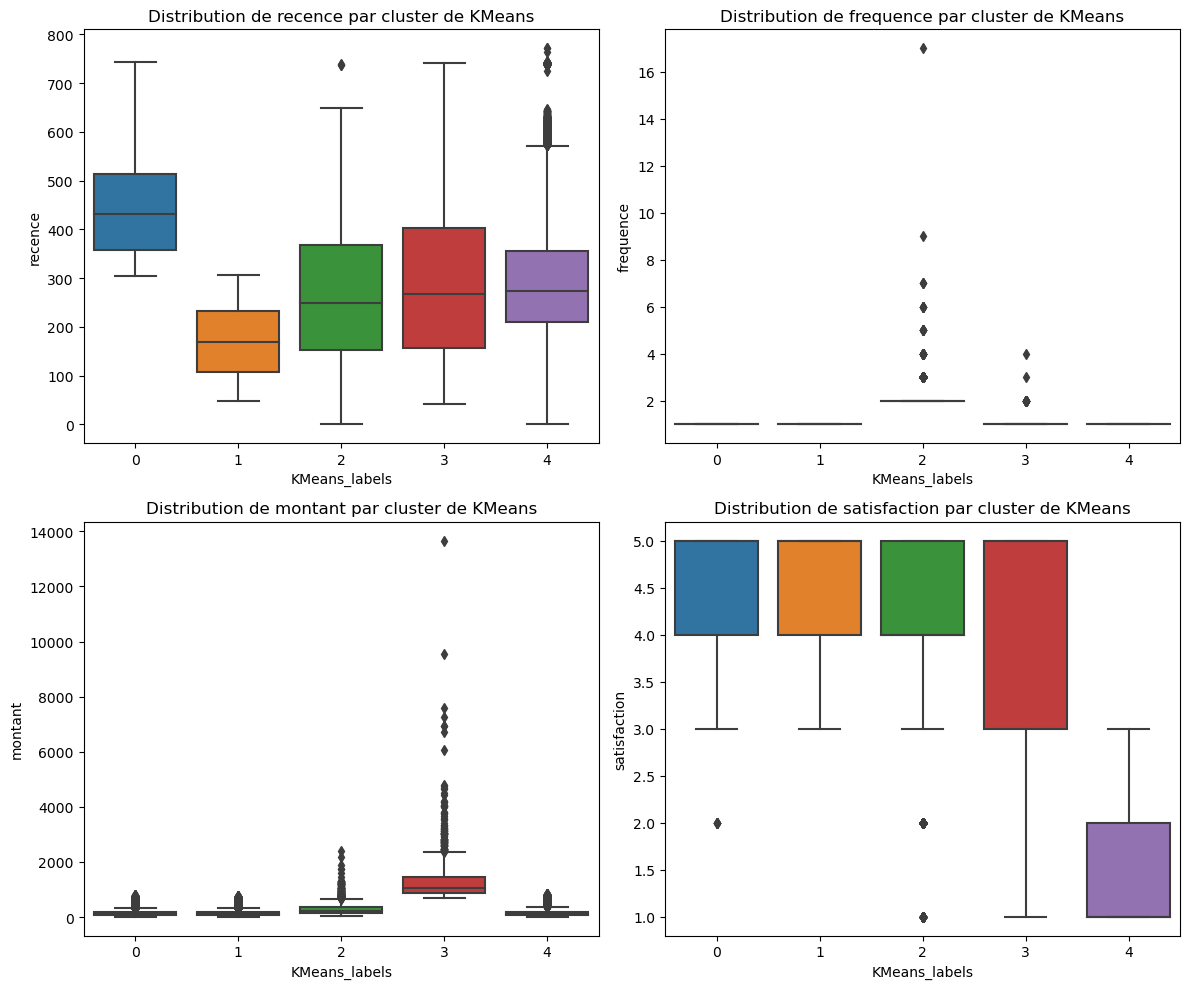


----------------------------------------------------------------------------------------------------
Répartition des variables par clusters créés par AC :



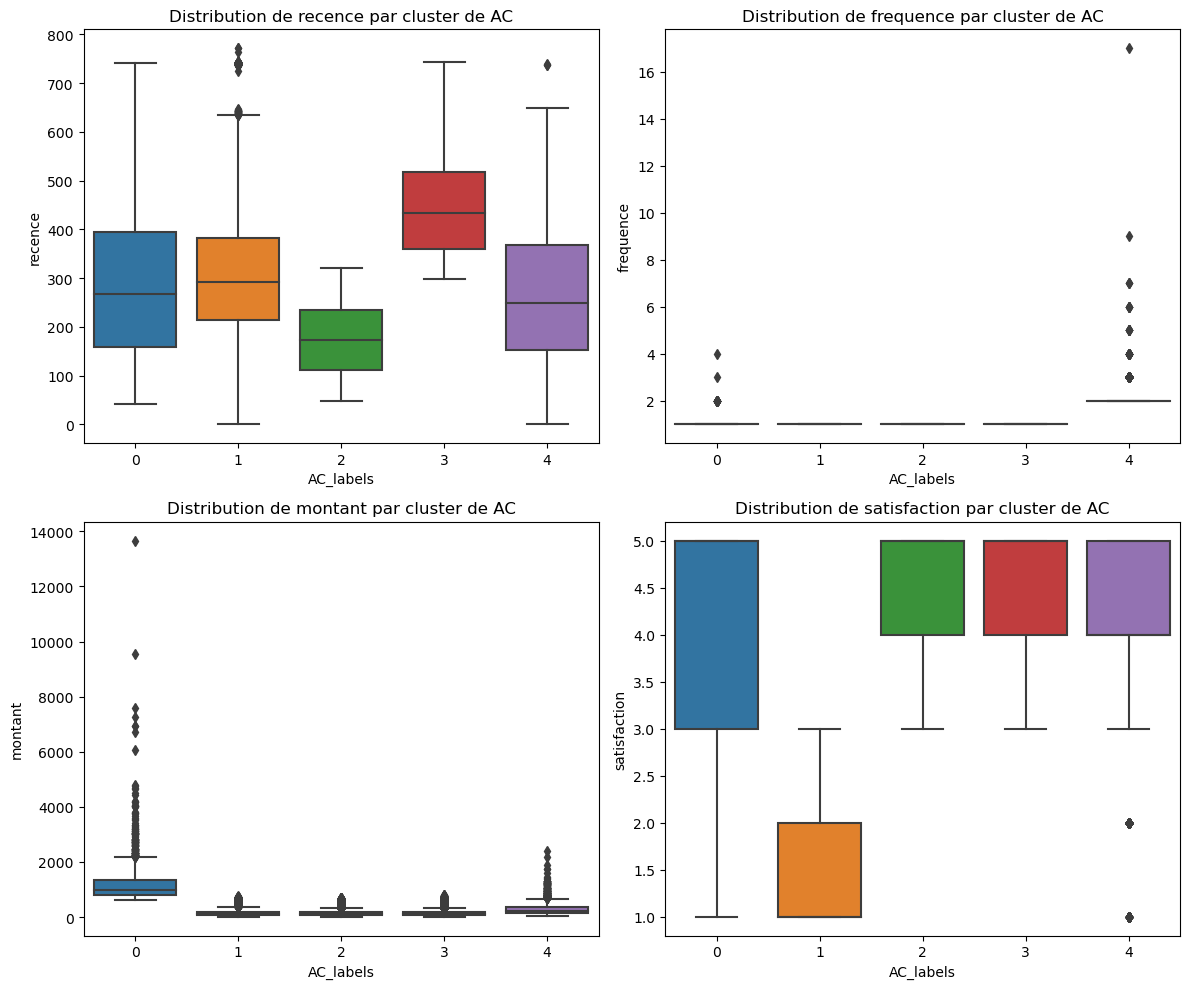


----------------------------------------------------------------------------------------------------
Répartition des variables par clusters créés par DBSCAN :



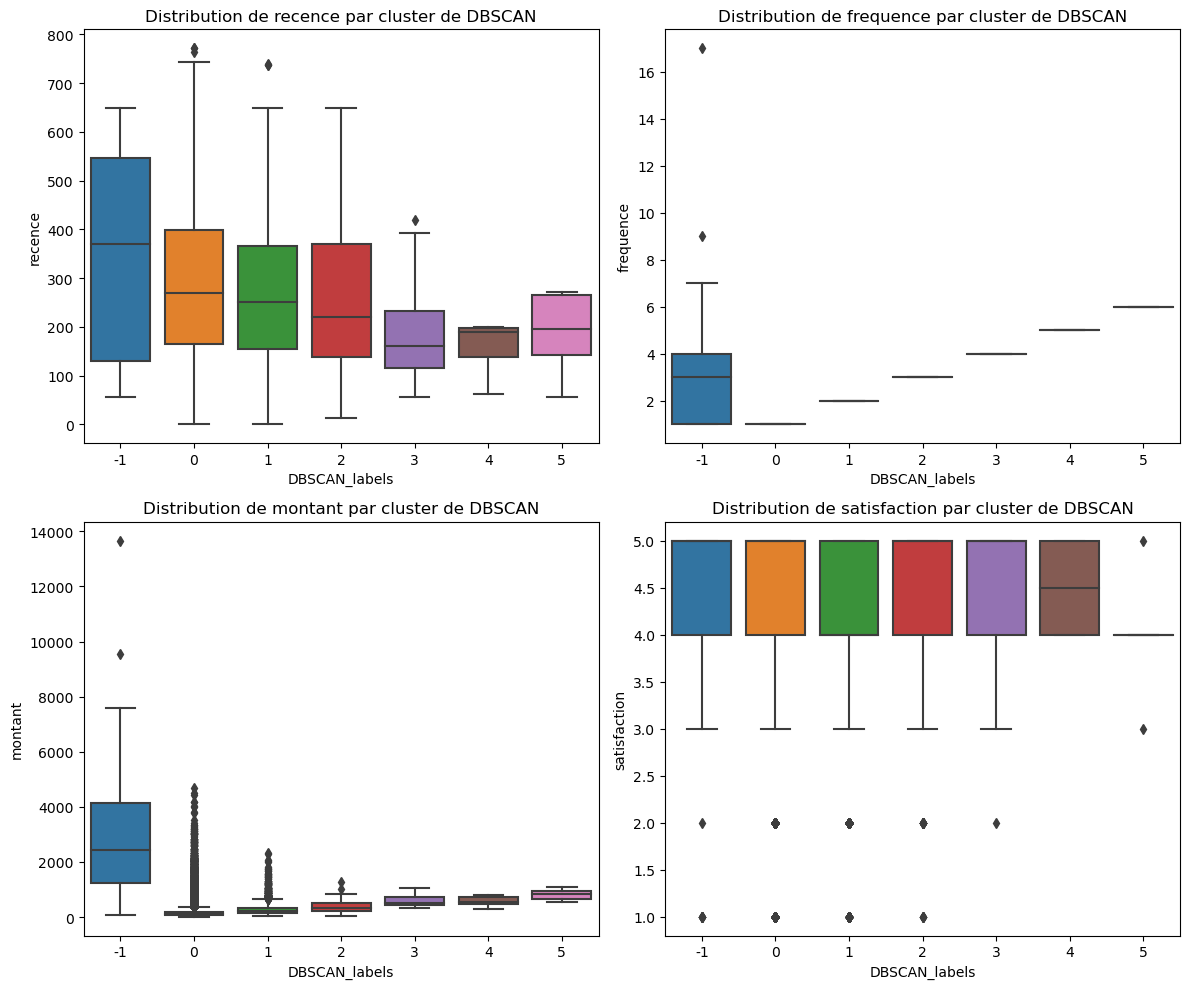


----------------------------------------------------------------------------------------------------


In [27]:
# Visualisation de la répartition des variables par clusters : 

# Création de la liste des colonnes de variables : 
ls_col = [col for col in data_RFMS.iloc[:, :4].columns]

# Création du nombre de lignes de subp
num_rows = (len(ls_col) + 1) // 2 

# Création des graphiques : 
for key in models_RFMS.keys(): 
    print(f"Répartition des variables par clusters créés par {key} :\n")

    plt.figure(figsize=(12, 5 * num_rows)) 
    
    for i, col in enumerate(ls_col, 1):
        label = key + '_labels'
        ls = [col, label]

        # Création d'une grille de sous graphique de dimenssions (num_rows x 2) :
        plt.subplot(num_rows, 2, i)
        
        sns.boxplot(x=label, y=col, data=data_RFMS.loc[:, ls])
        plt.title(f'Distribution de {col} par cluster de {key}')

    plt.tight_layout()  
    plt.show()
    
    print('\n'+'--'*50)
    
del ls_col, num_rows, key, i, col, label, ls

En comparant les clusters : 
- Les clusters de DBSCAN sont plus difficilement interprétables --> malgrès de meilleurs indices mathématiques, modèle non retenu. 
- Les clusters de KMeans et AgglomerativeClustering sont quasiment identique dans la signification. 
    - KMeans est globalement meilleur qu'AgglomerativeClustering sur les indices mathématiques. 
    - De plus, KMeans possède directement une méthode predict, contrairement à AgglomerativeClustering. Ce qui en fait un modèle plus simple à mettre en place et à utiliser. 
    
--> KMeans(n_clusters=5, random_state=42), sera le modèle retenu pour le feature engineering 1. 

Interprétation des clusters : 
- 0 : Clients ayant commandé il y a longtemps.
- 1 : Clients ayant commandé récemment. 
- 2 : Clients commandant souvent. 
- 3 : Clients dépensant le plus d'argent.
- 4 : Clients globalement insatisfaits. 

### 3.7. <a id='toc3_7_'></a>[Suppression des données](#toc0_)

In [28]:
# Suppression : 

del X, X_sampled, data_RFMS, models_RFMS

## 4. <a id='toc4_'></a>[Feature engineering 2](#toc0_)
Feature engineering avec les variables RFMS + autres variables (pour donner plus de pronfondeur à la segmentation)

### 4.1. <a id='toc4_1_'></a>[Création des données](#toc0_)

In [29]:
# Importation des données : 

name = 'data_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    data_FE2 = pickle.load(fichier)
    
del name, chemin_fichier

In [30]:
# Visualisation : 
print('Variables de data_FE2 :\n')
for col in data_FE2.columns:
    print(f"\t- {col}")
    
print('\n'+'--'*50+'\n')

print(f"Dimenssions de data_FE2 : {data_FE2.shape}")

print('\n'+'--'*50+'\n')

print('Type de données de data_FE2 :\n')
print(data_FE2.dtypes)

del col

Variables de data_FE2 :

	- recence
	- frequence
	- montant
	- satisfaction
	- payment_boleto
	- payment_credit_card
	- payment_debit_card
	- payment_voucher
	- payment_installments_mode
	- number_of_product_tot
	- temps_expedition_moy
	- jour_de_commande_mode
	- moment_de_commande_mode

----------------------------------------------------------------------------------------------------

Dimenssions de data_FE2 : (96093, 13)

----------------------------------------------------------------------------------------------------

Type de données de data_FE2 :

recence                        int64
frequence                      int64
montant                      float64
satisfaction                   int64
payment_boleto               float64
payment_credit_card          float64
payment_debit_card           float64
payment_voucher              float64
payment_installments_mode      int64
number_of_product_tot          int64
temps_expedition_moy         float64
jour_de_commande_mode         

In [31]:
# Création de X pour le clustering : 
X = fct_projet_5.transformation_df(df=data_FE2)

# Visualisation : 
print(f"Dimenssions de X une fois pré-traité: {X.shape}")

Dimenssions de X une fois pré-traité: (96093, 23)


In [32]:
# Création du dictionnaire de résultats des modèles : 
models_FE2 = {
    'KMeans' : {'model' : KMeans()},
    'AC' :{'model' : AgglomerativeClustering()},
    'DBSCAN' : {'model': DBSCAN()} 
}

### 4.2. <a id='toc4_2_'></a>[KMeans](#toc0_)

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

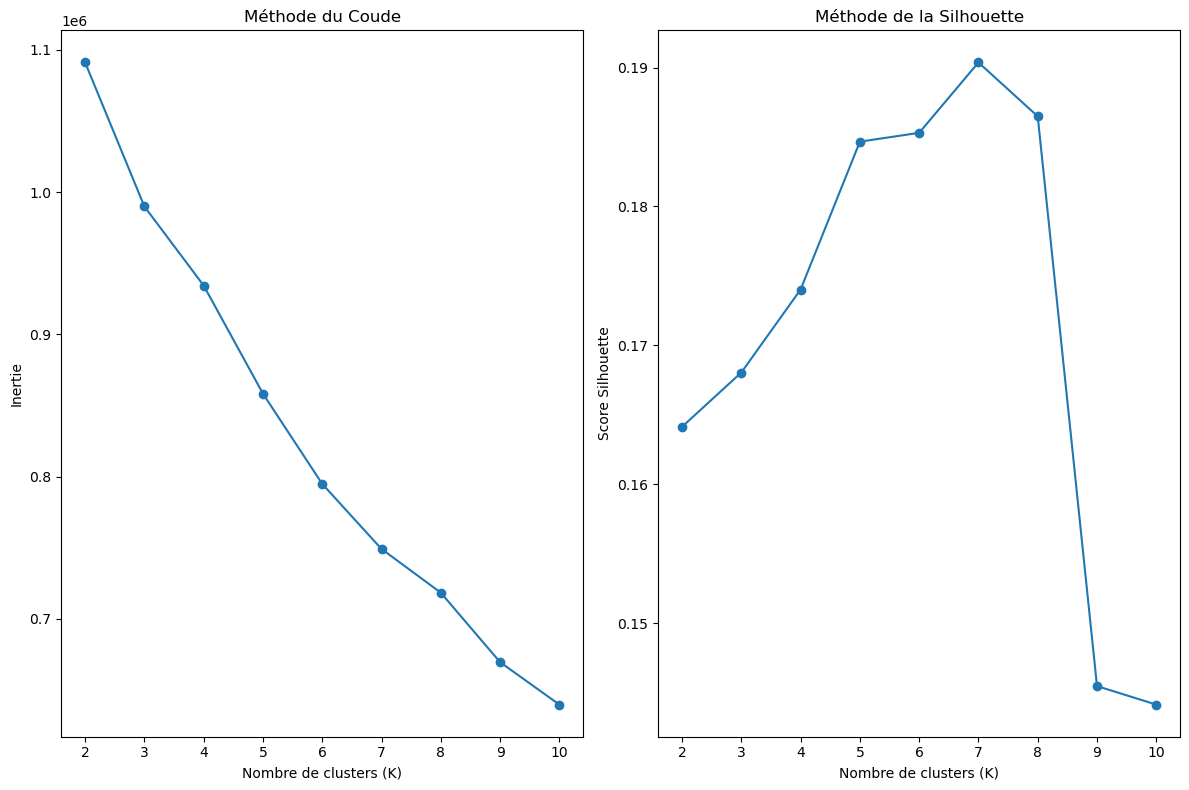

In [33]:
# Recherche du meilleur nombre de clusters : 
fct_projet_5.best_k_KMeans(data=X)

Ici : 
- La méthode de la silouhette donne un nombre de clusters de 7 
- la méthode du coude est moins franche mais on voit une inflexion de la pente pour 7 clusters également. 

Choix de K = 7.

In [34]:
# Calculs des métriques pour le modèle : 
params={'n_clusters' : 7, 'random_state' : 42}

models_FE2 = fct_projet_5.performances_modèle(
    dico=models_FE2,
    model="KMeans",
    params=params,
    data=X,
)

del params

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

### 4.3. <a id='toc4_3_'></a>[AgglomerativeClustering](#toc0_)
AgglomerativeClustering étant un modèle prenant beacoup de ressource, son optimisation sera réalisée sur un échantillonnage aléatoire de X 

In [35]:
# Echantillonnage aléatoire de X :
random_indices = np.random.choice(range(len(X)), size=len(X)//2, replace=False)
X_sampled = X.iloc[random_indices]

del random_indices

print(f"Taille de X_sampled : {X_sampled.shape} ")
print(f"Taille initial de X : {X.shape}")

Taille de X_sampled : (48046, 23) 
Taille initial de X : (96093, 23)


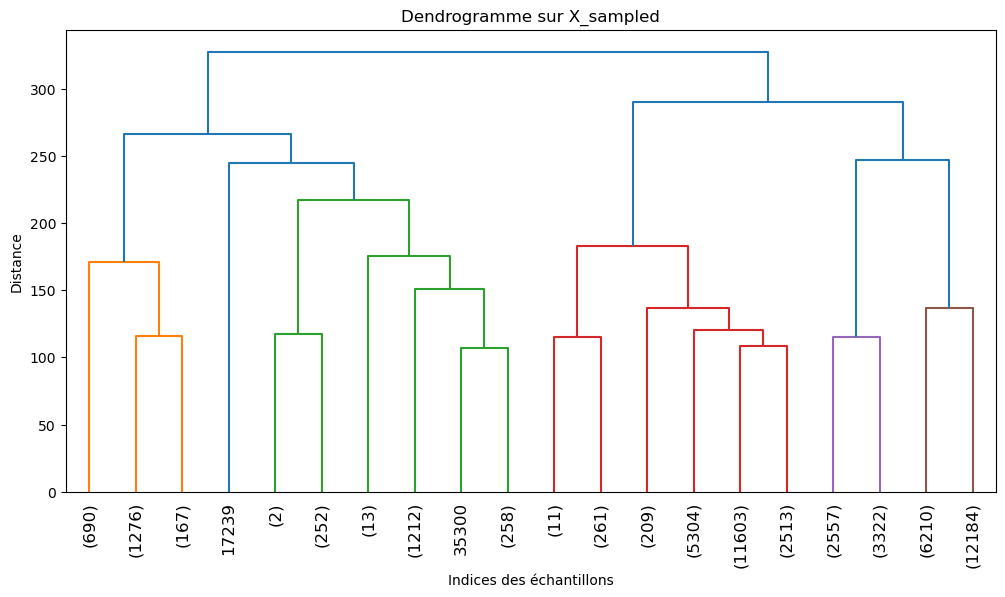

In [36]:
# Recherche du nombre de clusters : 
fct_projet_5.dendrogramme_AC(data=X_sampled)

En observant le dendrogramme si dessus, un nombre de clusters de 6 est choisit pour le modèle AgglomerativeClustering.

In [ ]:
# Calcul des métriques pour le modèle : 
params={'n_clusters' : 6}

models_FE2 = fct_projet_5.performances_modèle(
    dico=models_FE2,
    model="AC",
    params=params,
    data=X_sampled,
)

del params

### 4.4. <a id='toc4_4_'></a>[DBSCAN](#toc0_)

In [38]:
# Test primaire du modèle : 
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)

print(f"Le modèle DBSCAN sans optimisation trouve {len(np.unique(labels)) - 1} clusters.")

print(f"\nNombre de clients par clusters :\n")
for x in np.unique(labels): 
    print(f" Clusters {x} --> {len([y for y in labels if y == x])} clients")

print(f"Hyperparamètres par défaut : eps=0.5, min_samples=5")

del dbscan, labels

Le modèle DBSCAN sans optimisation trouve 813 clusters.

Nombre de clients par clusters :

 Clusters -1 --> 26497 clients
 Clusters 0 --> 684 clients
 Clusters 1 --> 241 clients
 Clusters 2 --> 110 clients
 Clusters 3 --> 292 clients
 Clusters 4 --> 1076 clients
 Clusters 5 --> 220 clients
 Clusters 6 --> 173 clients
 Clusters 7 --> 63 clients
 Clusters 8 --> 753 clients
 Clusters 9 --> 793 clients
 Clusters 10 --> 120 clients
 Clusters 11 --> 852 clients
 Clusters 12 --> 818 clients
 Clusters 13 --> 366 clients
 Clusters 14 --> 10 clients
 Clusters 15 --> 768 clients
 Clusters 16 --> 935 clients
 Clusters 17 --> 54 clients
 Clusters 18 --> 7 clients
 Clusters 19 --> 74 clients
 Clusters 20 --> 762 clients
 Clusters 21 --> 859 clients
 Clusters 22 --> 104 clients
 Clusters 23 --> 355 clients
 Clusters 24 --> 701 clients
 Clusters 25 --> 294 clients
 Clusters 26 --> 979 clients
 Clusters 27 --> 401 clients
 Clusters 28 --> 96 clients
 Clusters 29 --> 52 clients
 Clusters 30 --> 883 clie

 Clusters 288 --> 63 clients
 Clusters 289 --> 27 clients
 Clusters 290 --> 6 clients
 Clusters 291 --> 17 clients
 Clusters 292 --> 228 clients
 Clusters 293 --> 27 clients
 Clusters 294 --> 88 clients
 Clusters 295 --> 15 clients
 Clusters 296 --> 14 clients
 Clusters 297 --> 8 clients
 Clusters 298 --> 47 clients
 Clusters 299 --> 29 clients
 Clusters 300 --> 39 clients
 Clusters 301 --> 61 clients
 Clusters 302 --> 13 clients
 Clusters 303 --> 22 clients
 Clusters 304 --> 32 clients
 Clusters 305 --> 74 clients
 Clusters 306 --> 12 clients
 Clusters 307 --> 29 clients
 Clusters 308 --> 14 clients
 Clusters 309 --> 62 clients
 Clusters 310 --> 6 clients
 Clusters 311 --> 31 clients
 Clusters 312 --> 29 clients
 Clusters 313 --> 11 clients
 Clusters 314 --> 5 clients
 Clusters 315 --> 26 clients
 Clusters 316 --> 8 clients
 Clusters 317 --> 15 clients
 Clusters 318 --> 6 clients
 Clusters 319 --> 65 clients
 Clusters 320 --> 23 clients
 Clusters 321 --> 7 clients
 Clusters 322 --> 69

 Clusters 625 --> 14 clients
 Clusters 626 --> 8 clients
 Clusters 627 --> 5 clients
 Clusters 628 --> 8 clients
 Clusters 629 --> 11 clients
 Clusters 630 --> 5 clients
 Clusters 631 --> 6 clients
 Clusters 632 --> 6 clients
 Clusters 633 --> 7 clients
 Clusters 634 --> 9 clients
 Clusters 635 --> 9 clients
 Clusters 636 --> 5 clients
 Clusters 637 --> 7 clients
 Clusters 638 --> 3 clients
 Clusters 639 --> 5 clients
 Clusters 640 --> 6 clients
 Clusters 641 --> 5 clients
 Clusters 642 --> 6 clients
 Clusters 643 --> 5 clients
 Clusters 644 --> 9 clients
 Clusters 645 --> 5 clients
 Clusters 646 --> 6 clients
 Clusters 647 --> 6 clients
 Clusters 648 --> 5 clients
 Clusters 649 --> 10 clients
 Clusters 650 --> 5 clients
 Clusters 651 --> 9 clients
 Clusters 652 --> 4 clients
 Clusters 653 --> 5 clients
 Clusters 654 --> 5 clients
 Clusters 655 --> 5 clients
 Clusters 656 --> 7 clients
 Clusters 657 --> 6 clients
 Clusters 658 --> 4 clients
 Clusters 659 --> 5 clients
 Clusters 660 -->

Par défaut, DBSCAN nous donne un nombre de clusters beaucoup trop important. 

De plus, beacoup de clusters sont trop petits. 

--> Augmentation de eps et min_samples pour augmenter la taille des clusters.

In [39]:
# Recherche des meilleurs paramètres de DBSCAN : 
fct_projet_5.best_params_DBSCAN(data=X,
                   eps_range=[1.5, 1.7, 2, 2.2],
                   min_samples_range=[6, 7, 8]) 

,Eps,Min_samples,Nbre_clusters,Nbre_outliers,Taille_moy_clusters,Davies_Bouldin_score
0,1.5,6,36,4701,2538.666667,1.884975
1,1.5,7,26,5010,3503.192308,1.978186
2,1.5,8,19,5360,4775.421053,1.993579
3,1.7,6,21,2787,4443.142857,1.782961
4,1.7,7,13,3008,7160.384615,1.859971
5,1.7,8,10,3195,9289.800000,2.006734
6,2.0,6,9,1568,10502.777778,1.902142
7,2.0,7,8,1658,11804.375000,2.002236
8,2.0,8,7,1747,13478.000000,2.002791
9,2.2,6,7,1065,13575.428571,1.895011


Les paramètres eps = 2.2 et min_samples = 6, semblent être un bon compromis.

In [40]:
# Calculs des métriques pour le modèle :

params={'eps' : 2.2, 'min_samples' : 6}

models_FE2 = fct_projet_5.performances_modèle(
    dico=models_FE2,
    model="DBSCAN",
    params=params,
    data=X,
)

del params

### 4.5. <a id='toc4_5_'></a>[Enregistrement des modèles](#toc0_)

In [41]:
# Enregistrement du dictionnaire models_FE2 : 

name = 'models_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(models_FE2, f)
    
del name, chemin_fichier

### 4.6. <a id='toc4_6_'></a>[Résultats](#toc0_)
#### 4.6.1. <a id='toc4_6_1_'></a>[Comparaisons des modèles](#toc0_)

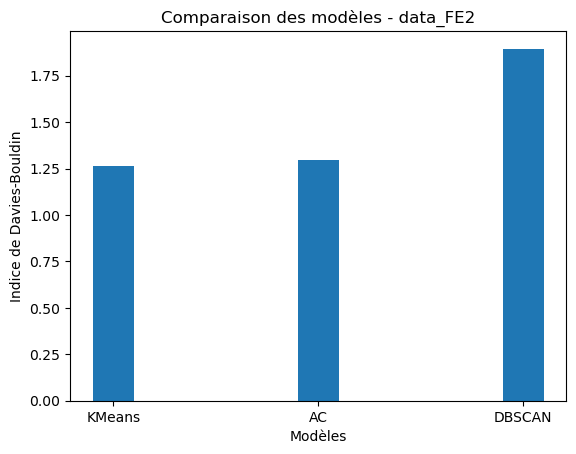

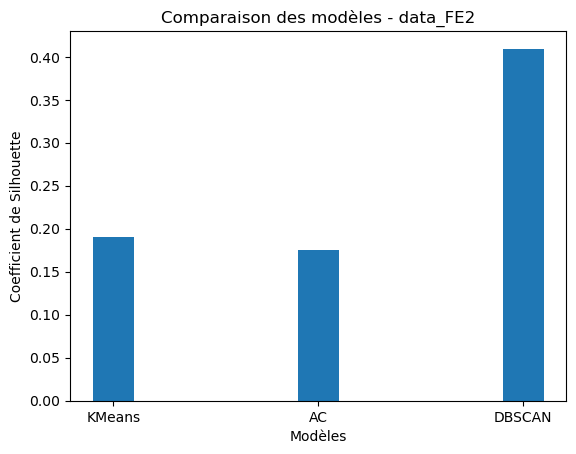

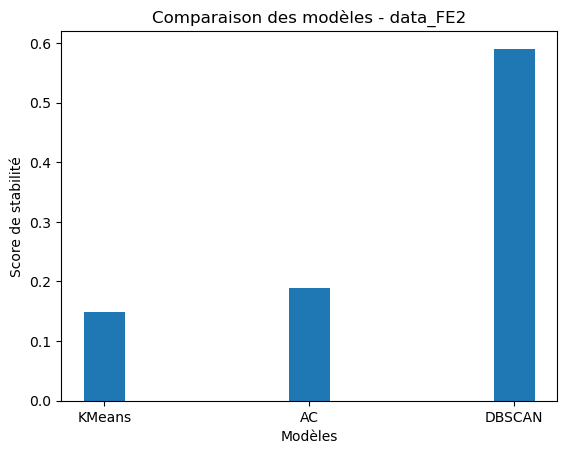

In [42]:
# Comparaison des modèles : 

# Création des données : 

ls_db = []
ls_silhouette = []
ls_stabilite = []
ls_name = []

for key in models_FE2.keys():
    ls_name.append(key)
    ls_db.append(models_FE2[key]['Davies-Bouldin'])
    ls_silhouette.append(models_FE2[key]['Silhouette'])
    ls_stabilite.append(models_FE2[key]['Score stabilité'])

width = 0.2

# Graph 1 - Indice Davies-Bouldin : 

plt.figure()
plt.bar(x=ls_name, height=ls_db, width=width)
plt.xlabel('Modèles')
plt.ylabel('Indice de Davies-Bouldin')
plt.title('Comparaison des modèles - data_FE2')
plt.show()

# Graph 2 - Silhouette : 

plt.figure()
plt.bar(x=ls_name, height=ls_silhouette, width=width)
plt.xlabel('Modèles')
plt.ylabel('Coefficient de Silhouette')
plt.title('Comparaison des modèles - data_FE2')
plt.show()

# Graph 3 - Score Stabilité : 

plt.figure()
plt.bar(x=ls_name, height=ls_stabilite, width=width)
plt.xlabel('Modèles')
plt.ylabel('Score de stabilité')
plt.title('Comparaison des modèles - data_FE2')
plt.show()

del ls_db, ls_name, ls_silhouette, ls_stabilite, key

Au vu de ces résultats, le modèles DBSCAN semble meilleur que les autres modèles : 
- Meilleure stabilité des clusters  (plus grand) --> clusters stables et robustes aux variations de l'ensemble de données.
- Meilleur coefficient de silhouette (plus grand) --> les objets sont bien regroupés dans leur cluster et les clusters sont bien séparés.
- Moins bon indice de Davies-Bouldin (plus grand) --> séparation des clusters.

#### 4.6.2. <a id='toc4_6_2_'></a>[Visualisation des clusters](#toc0_)

In [43]:
# Création des labels pour chaque modèle : 

for key in models_FE2.keys():
    if key == 'AC':
        data_FE2[key+'_labels'] = fct_projet_5.clustersing_with_AC(sample=X_sampled, data_full=X, key=key, dico=models_FE2)
    else: 
        data_FE2[key+'_labels'] = models_FE2[key]['model'].fit_predict(X)

del key

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Les deux composantes obtenues par la méthode PCA permettent d'expliquer 28.8366 % de la variance du datasets.


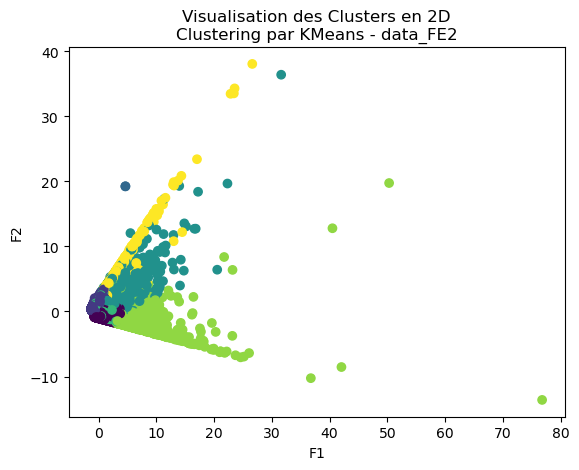

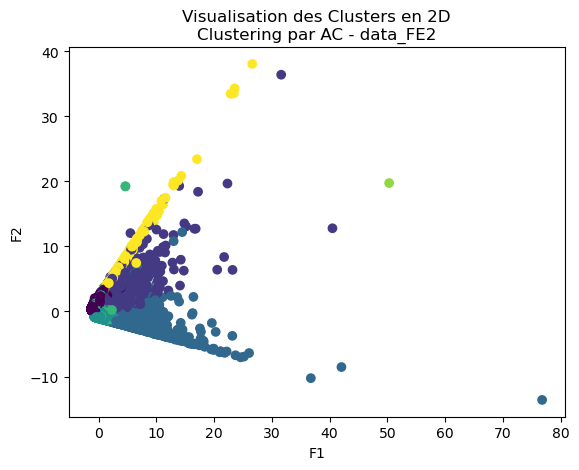

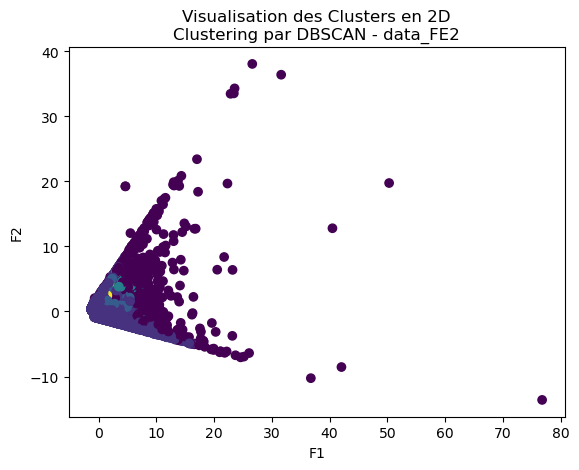

In [44]:
# Visualisation des clusters en 2 dimmensions (projection PCA): 

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=2)
data_FE2_pca = X.copy()
data_FE2_pca = pca.fit_transform(data_FE2_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les deux composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")

for key in models_FE2.keys():
    plt.figure()
    plt.scatter(data_FE2_pca[:, 0], data_FE2_pca[:, 1], c=data_FE2[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_FE2')
    plt.show()
    
del pca, data_FE2_pca, explained_variance, key

Les trois composantes obtenues par la méthode PCA permettent d'expliquer 38.3722 % de la variance du datasets.


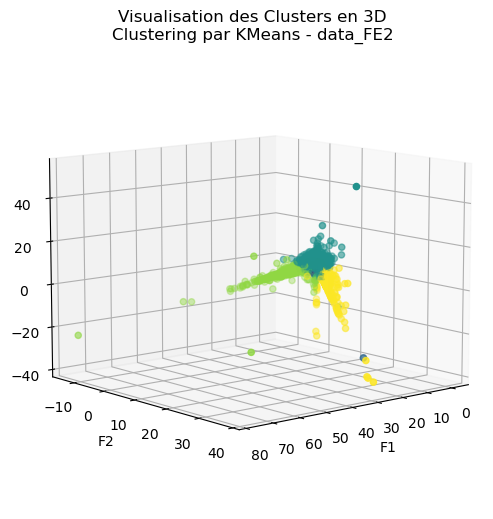

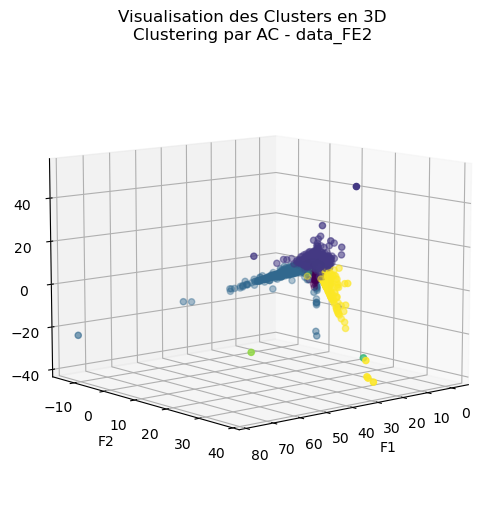

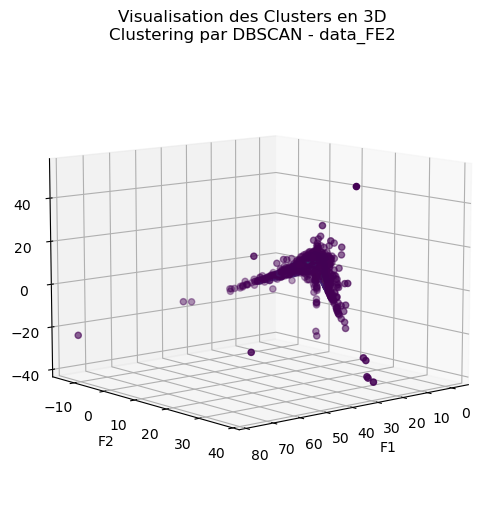

In [45]:
# Visualisation des clusters en 3 dimmensions (projection PCA): 

# %matplotlib notebook

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=3)
data_FE2_pca = X.copy()
data_FE2_pca = pca.fit_transform(data_FE2_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les trois composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")



for key in models_FE2.keys():
    
    fig = plt.figure(figsize=(10, 6))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_FE2_pca[:, 0], data_FE2_pca[:, 1], data_FE2_pca[:, 2], c=data_FE2[key+'_labels'])

    ax.set_xlabel('F1')
    ax.set_ylabel('F2')
    ax.set_zlabel('F3')
    plt.title('Visualisation des Clusters en 3D\n'
              f'Clustering par {key} - data_FE2')
    ax.view_init(azim=50, elev=10)
    
    plt.show()
    

# %matplotlib inline

del pca, data_FE2_pca, explained_variance, key

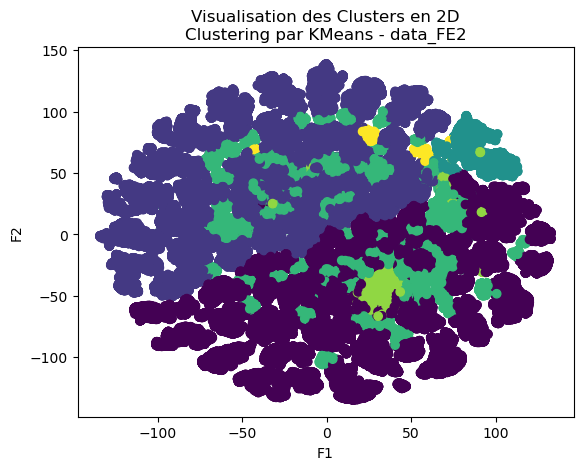

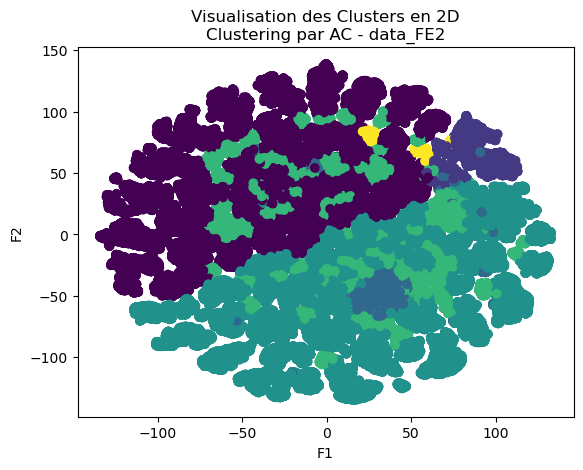

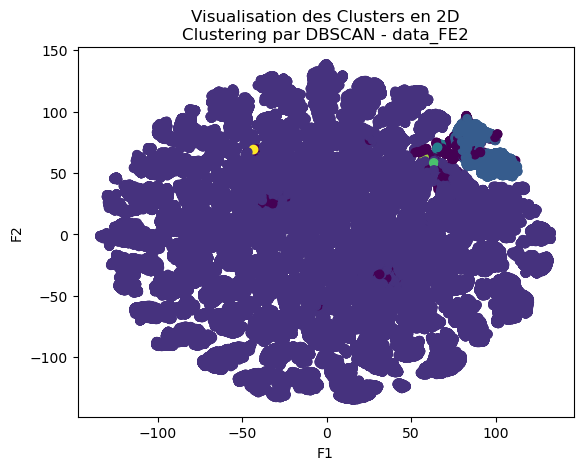

In [46]:
# Visualisation des clusters en 2 dimmensions (projection t-SNE): 

# Création d'un data_RFMS_tsne avec 2 composantes : 
tsne = TSNE(n_components=2, random_state=42)
data_RF2_tsne = X.copy()
data_RF2_tsne = tsne.fit_transform(data_RF2_tsne)


# Vous pouvez également ajouter d'autres informations à tsne_df si nécessaire, comme des étiquettes, des identifiants, etc.

for key in models_FE2.keys():
    plt.figure()
    plt.scatter(data_RF2_tsne[:, 0], data_RF2_tsne[:, 1], c=data_FE2[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_FE2')
    plt.show()
    
del tsne, data_RF2_tsne, key

#### 4.6.3. <a id='toc4_6_3_'></a>[Visualisation de la répartition des clusters](#toc0_)

In [47]:
# Satistiques descriptives : 

dico = {}
numerical_col = make_column_selector(dtype_include=np.number)
categorial_col = make_column_selector(dtype_exclude=np.number)

for col in data_FE2[numerical_col].columns:
    dico[col] = ['mean', 'std', 'median']
for col in data_FE2[categorial_col].columns:
    dico[col] = 'first'

cluster_stats = {}   
    
for key in models_FE2.keys():
    cluster_stats[key] = data_FE2.groupby(key+'_labels').agg(dico)
    
for key in cluster_stats.keys():
    print(f"Statistiques descriptives des clusters créés par {key} : ")
    display(cluster_stats[key])
    print('--'*50+'\n')
    
del dico, col, cluster_stats, numerical_col, categorial_col

Statistiques descriptives des clusters créés par KMeans : 


recence                    frequence                   \
                     mean         std median      mean       std median   
KMeans_labels                                                             
0              292.434253  155.193730  276.0  1.000000  0.000000    1.0   
1              281.617183  153.436533  262.0  1.000000  0.000000    1.0   
2              580.500000    0.707107  580.5  1.000000  0.000000    1.0   
3              269.346600  146.612263  248.0  2.020683  0.588456    2.0   
4              294.636939  147.170520  269.0  1.000000  0.000000    1.0   
5              292.411705  159.670661  271.5  1.023209  0.163463    1.0   
6              307.154622  159.709668  302.0  1.068908  0.278811    1.0   

                   montant                     satisfaction  ...  \
                      mean         std  median         mean  ...   
KMeans_labels                                                ...   
0               159.582203  116.609606  128.65     4.569876  ...   
1               102.381725   82.676738   76.78     4.580649  ...   
2                87.670000    4.270925   87.67     1.000000  ...   
3               283.596095  202.320357  227.36     4.051708  ...   
4               150.506952  121.052026  114.04     1.232259  ...   
5              1194.214329  682.336820  990.02     3.923310  ...   
6              1078.458017  729.980270  850.92     3.800000  ...   

              KMeans_labels        AC_labels                  DBSCAN_labels  \
                        std median      mean       std median          mean   
KMeans_labels                                                                 
0                       0.0    0.0  2.977701  0.172784    3.0     -0.000619   
1                       0.0    1.0  0.005695  0.122995    0.0     -0.002002   
2                       0.0    2.0  4.000000  0.000000    4.0     -1.000000   
3                       0.0    3.0  1.000627  0.025031    1.0      0.718897   
4                       0.0    4.0  3.918972  0.471547    4.0     -0.008080   
5                       0.0    5.0  1.975782  0.199491    2.0     -0.103935   
6                       0.0    6.0  5.655462  1.288625    6.0     -0.242017   

                               jour_de_commande_mode moment_de_commande_mode  
                    std median                 first                   first  
KMeans_labels                                                                 
0              0.024880    0.0              Thursday                   matin  
1              0.044702    0.0                Monday                   matin  
2              0.000000   -1.0              Thursday                    nuit  
3              0.750099    1.0              Saturday                    nuit  
4              0.097672    0.0             Wednesday                   matin  
5              0.329126    0.0                Monday                    midi  
6              0.954477    0.0                Friday                    midi  

[7 rows x 44 columns]

----------------------------------------------------------------------------------------------------

Statistiques descriptives des clusters créés par AC : 


recence                    frequence                   \
                 mean         std median      mean       std median   
AC_labels                                                             
0          281.485219  153.405394  262.0  1.000000  0.000000    1.0   
1          272.434614  147.909917  250.0  1.901852  0.643672    2.0   
2          290.173495  155.894118  271.0  1.014250  0.118541    1.0   
3          292.344001  155.216834  276.0  1.000000  0.000000    1.0   
4          295.373588  147.602607  269.0  1.000000  0.000000    1.0   
5           60.000000         NaN   60.0  3.000000       NaN    3.0   
6          316.893617  156.587894  313.5  1.070922  0.283229    1.0   

               montant                      satisfaction  ... KMeans_labels  \
                  mean         std   median         mean  ...           std   
AC_labels                                                 ...                 
0           102.422537   85.128945    76.74     4.577601  ...      0.159382   
1           290.377581  222.119867   231.45     3.967100  ...      0.712778   
2          1021.844339  614.264134   820.35     3.899181  ...      2.090926   
3           151.619382  101.048410   126.43     4.570736  ...      0.020529   
4           140.785987  103.588849   110.92     1.227087  ...      0.175215   
5          9553.020000         NaN  9553.02     1.000000  ...           NaN   
6          1059.905248  711.474906   840.06     3.799645  ...      0.660437   

                 AC_labels             DBSCAN_labels                   \
          median      mean  std median          mean       std median   
AC_labels                                                               
0            1.0       0.0  0.0    0.0     -0.001693  0.090850    0.0   
1            3.0       1.0  0.0    1.0      0.620404  0.765296    1.0   
2            5.0       2.0  0.0    2.0     -0.069113  0.276543    0.0   
3            0.0       3.0  0.0    3.0     -0.000527  0.022946    0.0   
4            4.0       4.0  0.0    4.0     -0.006199  0.078492    0.0   
5            5.0       5.0  NaN    5.0     -1.000000       NaN   -1.0   
6            6.0       6.0  0.0    6.0     -0.265957  0.717835    0.0   

          jour_de_commande_mode moment_de_commande_mode  
                          first                   first  
AC_labels                                                
0                        Monday                   matin  
1                      Thursday                   matin  
2                        Monday                    midi  
3                      Thursday                   matin  
4                     Wednesday                   matin  
5                       Tuesday                    soir  
6                        Friday                    midi  

[7 rows x 44 columns]

----------------------------------------------------------------------------------------------------

Statistiques descriptives des clusters créés par DBSCAN : 


recence                    frequence                   \
                     mean         std median      mean       std median   
DBSCAN_labels                                                             
-1             284.993427  172.904258  251.0  1.615023  1.075251    1.0   
 0             288.258161  153.420604  269.0  1.000000  0.000000    1.0   
 1             271.469544  143.091040  252.0  2.000000  0.000000    2.0   
 2             250.285714  142.725713  218.0  3.000000  0.000000    3.0   
 3             390.000000  103.223059  394.0  1.000000  0.000000    1.0   
 4             235.700000  119.027588  213.0  1.000000  0.000000    1.0   
 5             330.500000   40.779897  334.5  1.000000  0.000000    1.0   
 6              79.333333   24.262454   66.5  1.000000  0.000000    1.0   

                   montant                       satisfaction  ...  \
                      mean          std   median         mean  ...   
DBSCAN_labels                                                  ...   
-1             1005.512948  1053.275605  696.150     3.384977  ...   
 0              154.470925   183.376233  105.080     4.090328  ...   
 1              247.504582   163.978481  204.820     4.108915  ...   
 2              309.670476   160.528383  273.700     4.447619  ...   
 3              900.672000    78.376085  893.520     4.400000  ...   
 4              279.463000    90.178821  259.375     1.100000  ...   
 5              919.707500    99.862116  921.180     4.250000  ...   
 6              816.055000    40.169820  817.460     4.833333  ...   

              KMeans_labels        AC_labels                  DBSCAN_labels  \
                        std median      mean       std median          mean   
DBSCAN_labels                                                                 
-1                 1.555172    4.0  2.235681  1.967271    1.0          -1.0   
 0                 1.443860    1.0  1.865904  1.633454    3.0           0.0   
 1                 0.155134    3.0  1.006858  0.082543    1.0           1.0   
 2                 0.000000    3.0  1.000000  0.000000    1.0           2.0   
 3                 0.000000    6.0  6.000000  0.000000    6.0           3.0   
 4                 0.316228    3.0  1.000000  0.000000    1.0           4.0   
 5                 0.000000    6.0  6.000000  0.000000    6.0           5.0   
 6                 0.000000    6.0  0.000000  0.000000    0.0           6.0   

                          jour_de_commande_mode moment_de_commande_mode  
               std median                 first                   first  
DBSCAN_labels                                                            
-1             0.0   -1.0               Tuesday              après-midi  
 0             0.0    0.0              Thursday                   matin  
 1             0.0    1.0              Saturday                    nuit  
 2             0.0    2.0                Friday                   matin  
 3             0.0    3.0                Monday              après-midi  
 4             0.0    4.0               Tuesday                   matin  
 5             0.0    5.0              Saturday                   matin  
 6             0.0    6.0               Tuesday                   matin  

[8 rows x 44 columns]

----------------------------------------------------------------------------------------------------



Répartition des variables par clusters créés par KMeans :



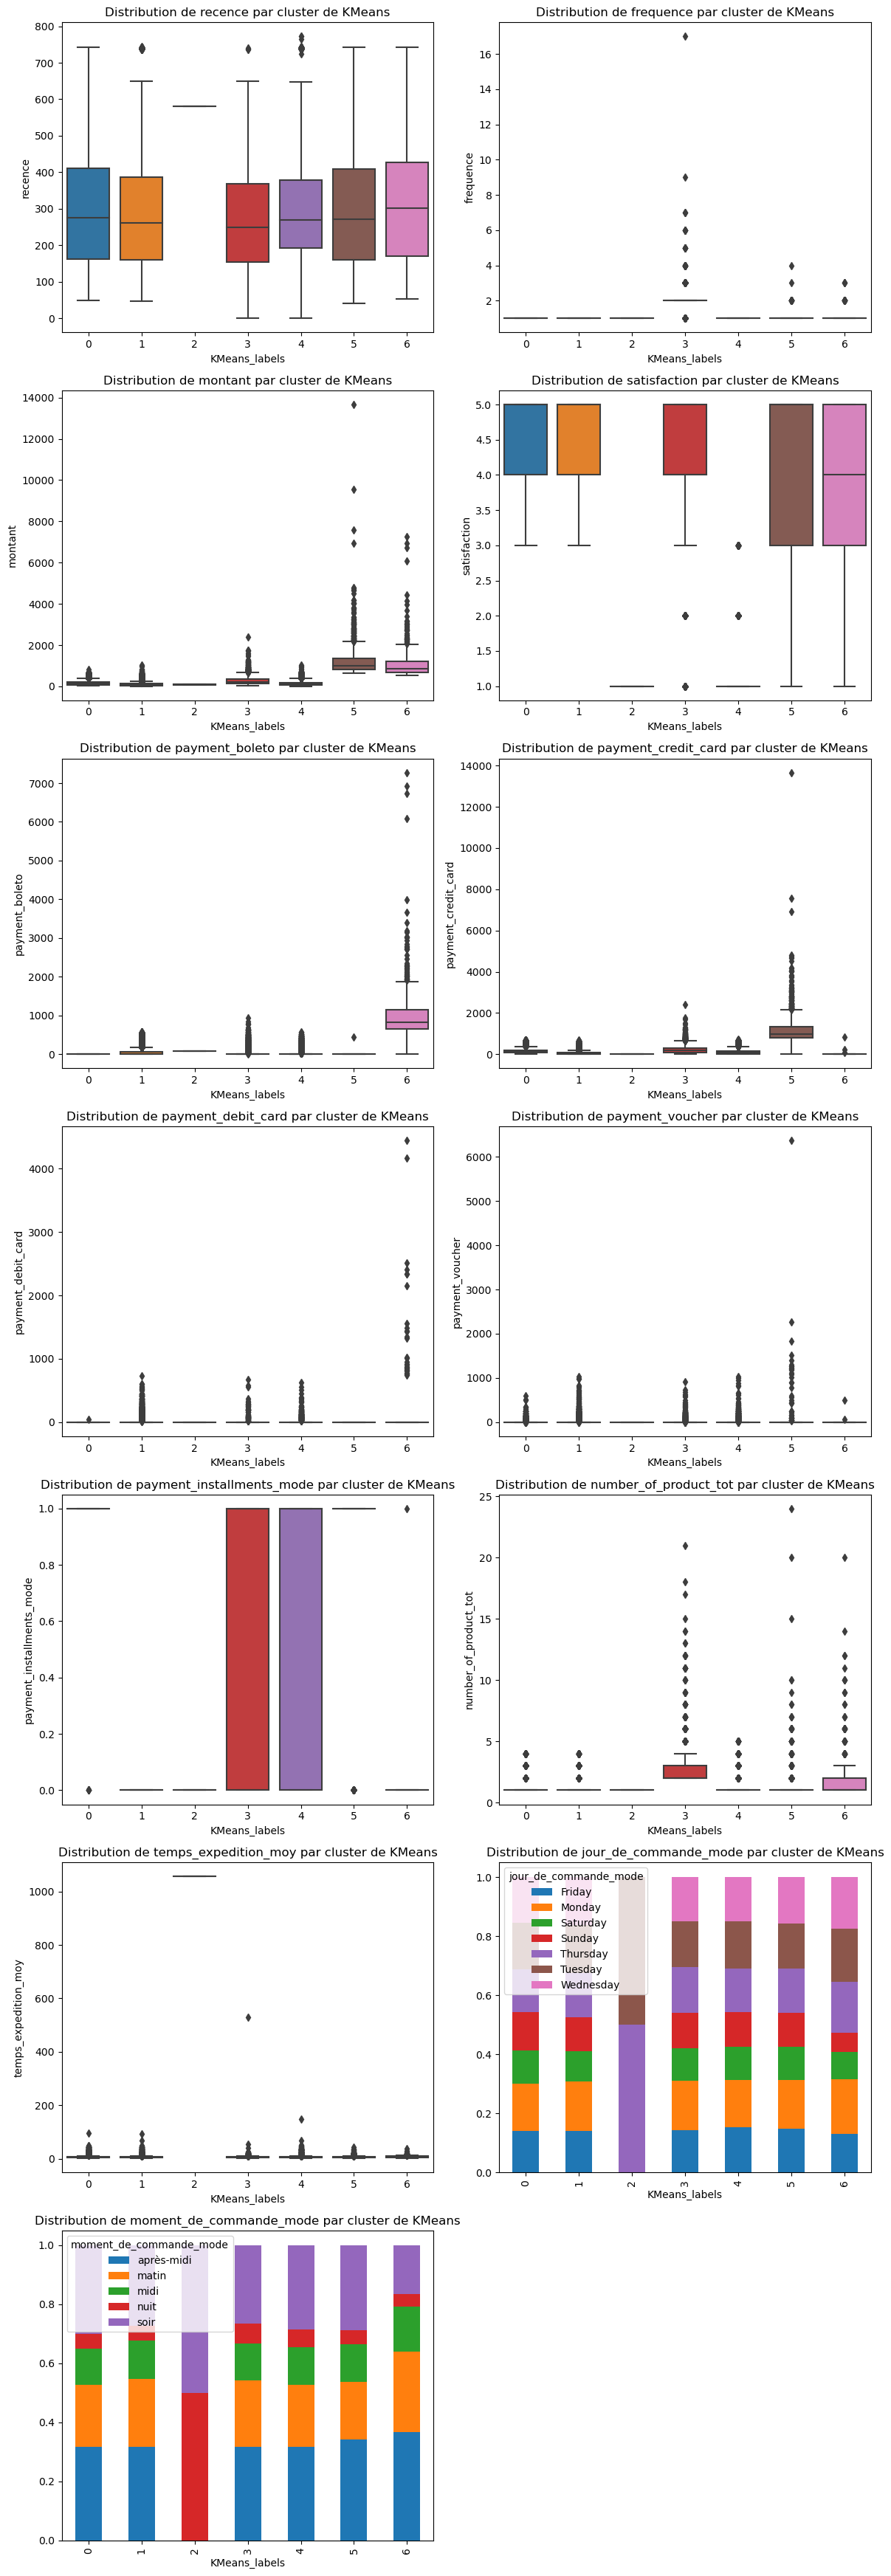


----------------------------------------------------------------------------------------------------
Répartition des variables par clusters créés par AC :



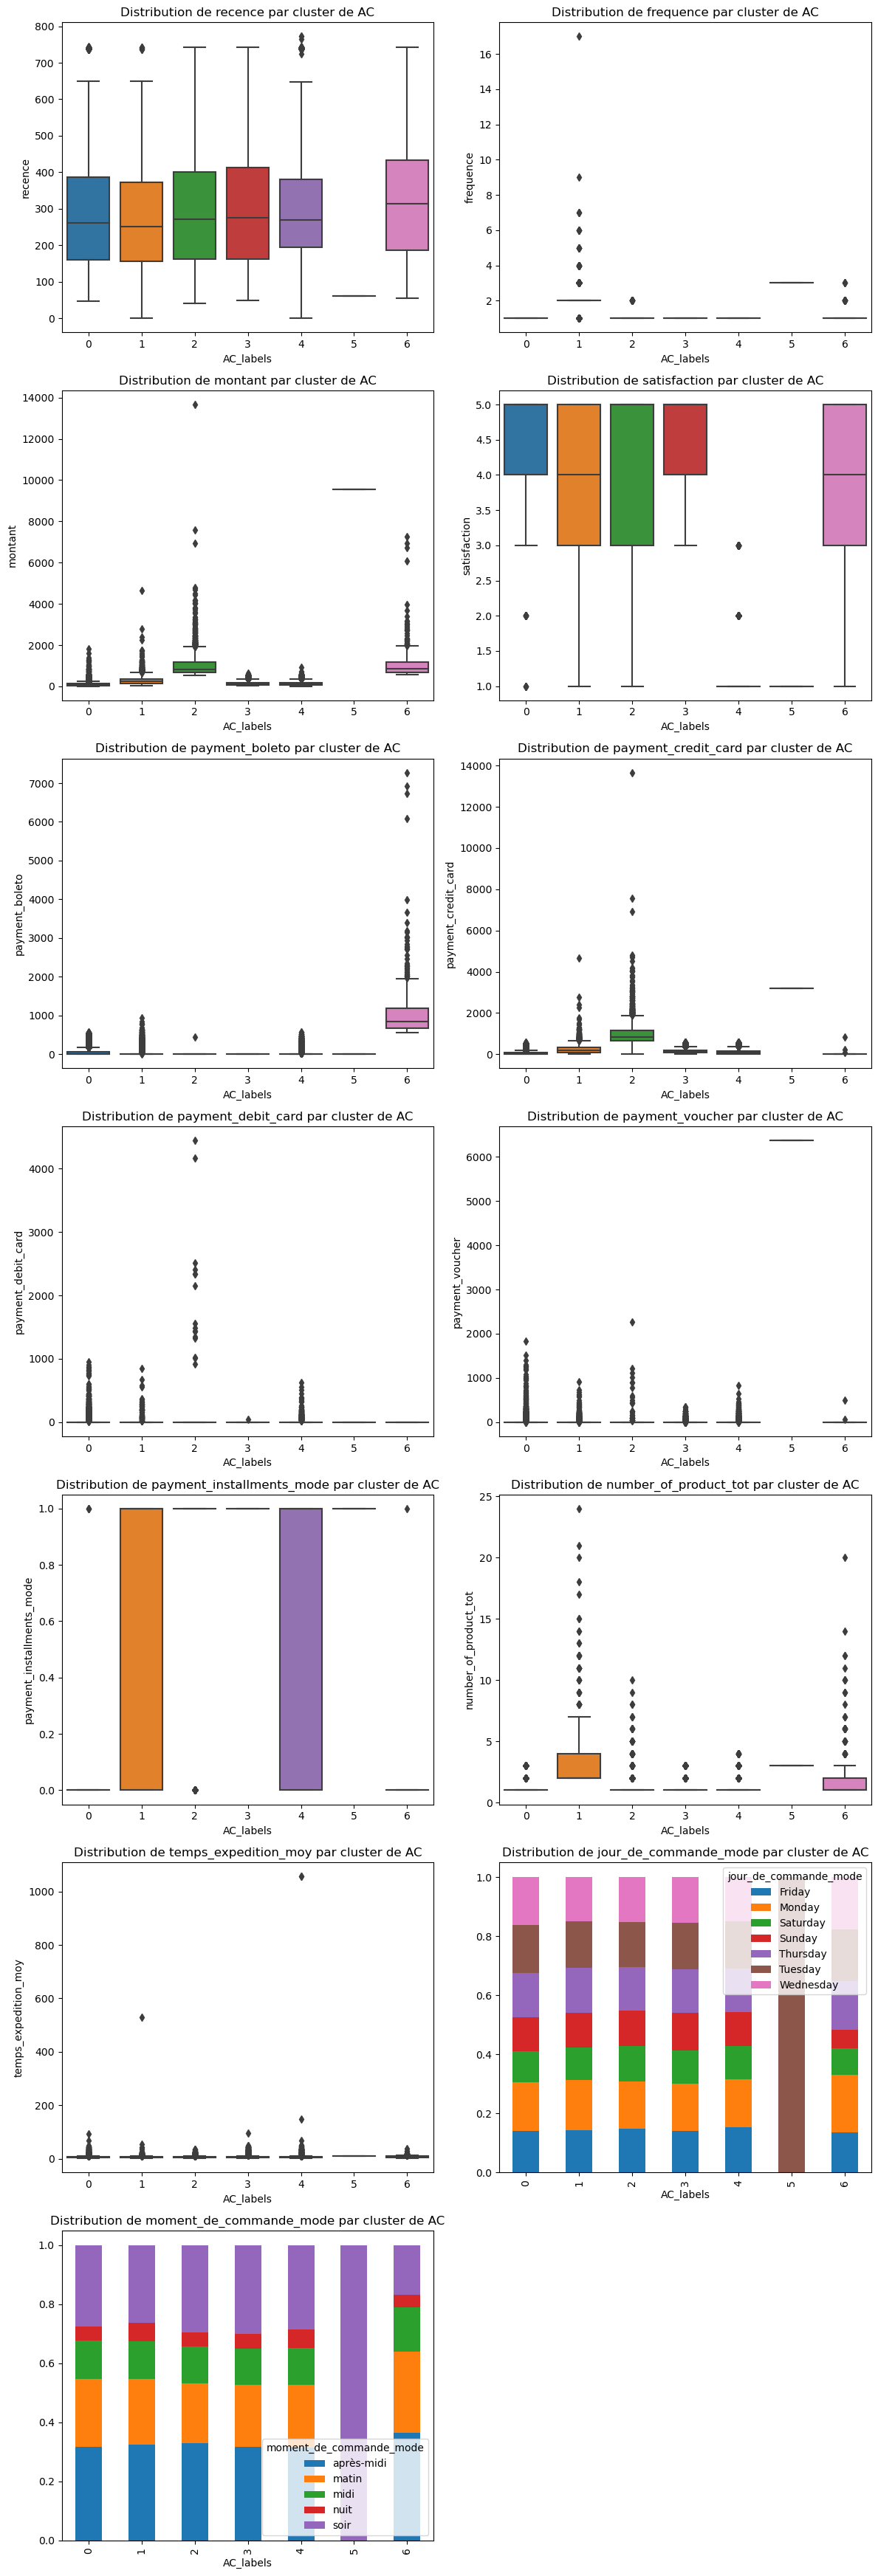


----------------------------------------------------------------------------------------------------
Répartition des variables par clusters créés par DBSCAN :



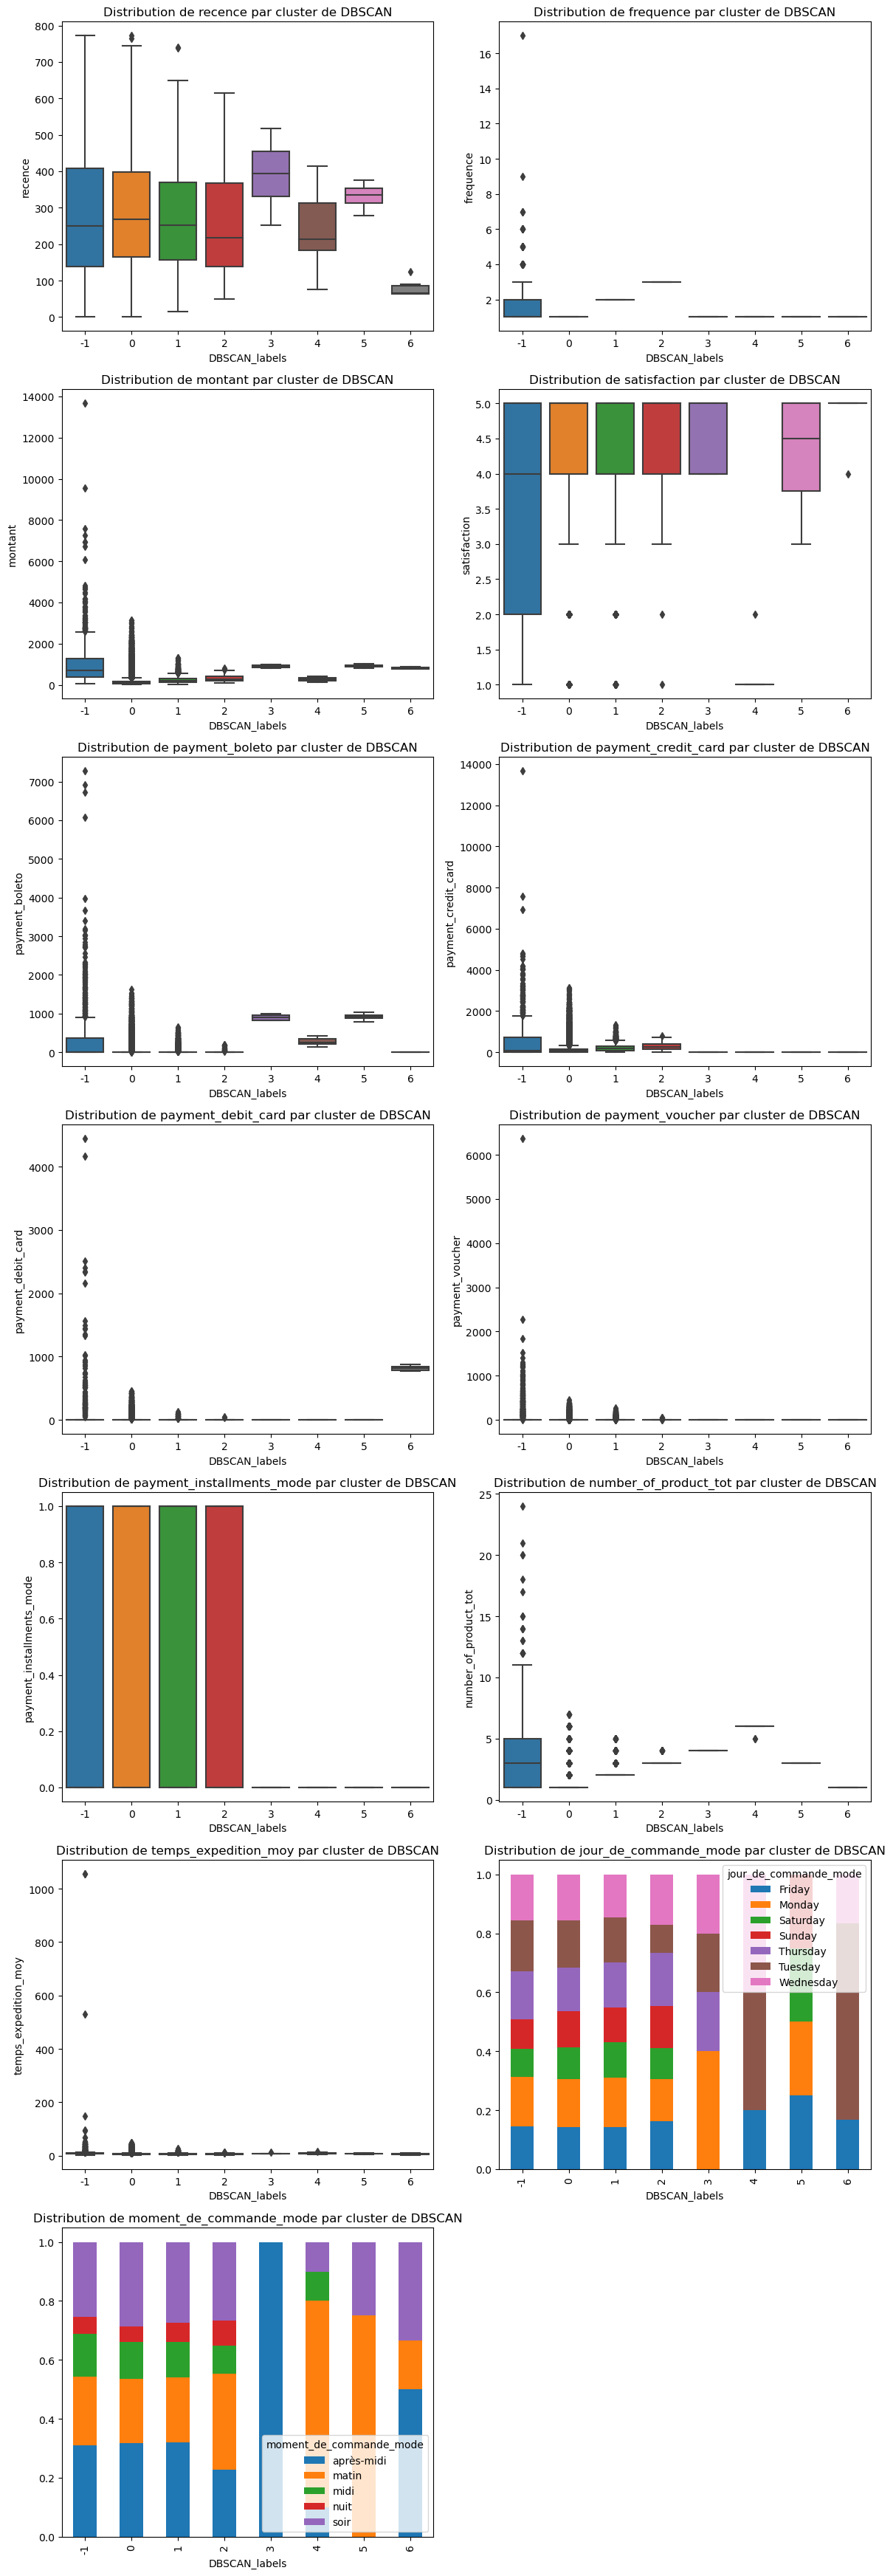


----------------------------------------------------------------------------------------------------


In [48]:
# Visualisation de la répartition des variables par clusters : 

# Création de la liste des colonnes de variables : 
last_col = data_FE2.shape[1] - len(models_FE2)
ls_col = [col for col in data_FE2.iloc[:, :last_col].columns]

# Sélection des variables categorielles : 
categorical_cols = data_FE2.select_dtypes(include=['object']).columns

# Création du nombre de lignes de subplot : 
num_rows = (len(ls_col) + 1) // 2 

# Création des graphiques : 
for key in models_FE2.keys(): 
    print(f"Répartition des variables par clusters créés par {key} :\n")

    plt.figure(figsize=(12, 5 * num_rows)) 
    
    for i, col in enumerate(ls_col, 1):
        label = key + '_labels'
        ls = [col, label]

        # Création d'une grille de sous graphique de dimenssions (num_rows x 2) :
        plt.subplot(num_rows, 2, i)
        
        if col in categorical_cols:
            cat_freq = data_FE2.groupby([label, col]).size().unstack(fill_value=0)
            cat_freq = cat_freq.divide(cat_freq.sum(axis=1), axis=0)
            cat_freq = cat_freq.sort_values(by=label, ascending=True)

            # Création du graphique en barres empilées
            cat_freq.plot(kind='bar', stacked=True, ax=plt.gca())
            plt.title(f'Distribution de {col} par cluster de {key}')
            
            #sns.countplot(x=label, hue=col, data=data_FE2)
            #plt.title(f'Distribution de {col} par cluster de {key}')
        else:
            sns.boxplot(x=label, y=col, data=data_FE2)
            plt.title(f'Distribution de {col} par cluster de {key}')

    plt.tight_layout()  
    plt.show()
    
    print('\n'+'--'*50)
    
del ls_col, num_rows, key, i, col, label, ls, last_col, categorical_cols, cat_freq

En comparant les clusters : 
- Les clusters de DBSCAN sont plus difficilement interprétables --> malgrès de meilleurs indices mathématiques, modèle non retenu. 
- Les clusters de KMeans et AgglomerativeClustering sont quasiment identique dans la signification. 
    - KMeans est globalement meilleur qu'AgglomerativeClustering sur les indices mathématiques. 
    - De plus, KMeans possède directement une méthode predict, contrairement à AgglomerativeClustering. Ce qui en fait un mpdèle polus simple à mettre en place et à utiliser.    
 
--> KMeans(n_clusters=7, random_state=42), sera le modèle retenu pour le feature engineering 2. 

Interprétation des Clusters de KMeans : 

- Cluster 0 - "Satisfaits avec Paiement Échelonné"

    - Segmentation : Clients très satisfaits utilisant le paiement échelonné.
    - Logique Sous-jacente : Ces clients sont satisfaits, mais préfèrent étaler leurs paiements. Ils peuvent avoir des contraintes budgétaires.
    - Actions Marketing Potentielles : Leur offrir des options de paiement flexibles, des remises pour paiement rapide, ou des incitations à dépenser plus tout en continuant à étaler les paiements.

- Cluster 1 - "Satisfaits avec Faibles Dépenses et Paiement Échelonné"

    - Segmentation : Clients très satisfaits avec des dépenses limitées utilisant le paiement échelonné.
    - Logique Sous-jacente : Malgré leurs faibles dépenses, ils sont satisfaits et préfèrent étaler les paiements.
    - Actions Marketing Potentielles : Les encourager à augmenter leurs dépenses avec des offres spéciales ou des programmes de fidélité.

- Cluster 2 - "Clients Inactifs et Insatisfaits"

     - Segmentation : Clients inactifs et insatisfaits.
     - Logique Sous-jacente : Ces clients n'ont pas commandé récemment et sont insatisfaits de leur expérience.
     - Actions Marketing Potentielles : Réactiver ces clients avec des offres personnalisées, des remises, ou une enquête pour comprendre leur insatisfaction.

- Cluster 3 - "Satisfaits avec Moyennes Dépenses et Fidélité"

    - Segmentation : Clients très satisfaits avec des dépenses moyennes et fidèles.
    - Logique Sous-jacente : Ces clients sont satisfaits, dépensent de manière constante, et sont fidèles au  site.
    - Actions Marketing Potentielles : Récompenser leur fidélité avec des avantages exclusifs, des offres spéciales de fidélité, ou des programmes de parrainage.

- Cluster 4 - "Insatisfaits avec Faibles Dépenses"

    - Segmentation : Clients insatisfaits avec des dépenses limitées.
    - Logique Sous-jacente : Ces clients ont dépensé peu et sont insatisfaits. Ils ont besoin d'une meilleure expérience client.
    - Actions Marketing Potentielles : Améliorer leur expérience, demander des commentaires, et offrir des incitations pour qu'ils reviennent.

- Cluster 5 - "Satisfaits avec Fortes Dépenses et Paiement Échelonné"

    - Segmentation : Clients très satisfaits dépensant beaucoup et utilisant le paiement échelonné.
    - Logique Sous-jacente : Ils sont satisfaits, dépensent beaucoup, mais préfèrent étaler leurs paiements.
    - Actions Marketing Potentielles : Les encourager à dépenser davantage en proposant des produits haut de gamme ou des avantages spéciaux pour les gros acheteurs.

- Cluster 6 - "Satisfaits avec Fortes Dépenses en Espèces"

    - Segmentation : Clients très satisfaits payant beaucoup en espèces.
    - Logique Sous-jacente : Ces clients sont satisfaits, dépensent beaucoup, mais préfèrent payer en espèces.
    - Actions Marketing Potentielles : Leur offrir des incitations pour utiliser d'autres modes de paiement, comme des remises sur les cartes de crédit ou des avantages liés au paiement électronique.

### 4.7. <a id='toc4_7_'></a>[Suppression des données](#toc0_)

In [49]:
# Suppression : 
del X, X_sampled, models_FE2

## 5. <a id='toc5_'></a>[Feature engineering 3](#toc0_)
Basé sur le feature engineering 2 mais sans les variables de jours et moments d'achat. 

Utilisation uniquemlent du KMeans qui a montré de meilleurs résultats sur les précédents clustering. 

### 5.1. <a id='toc5_1_'></a>[Création des données](#toc0_)

In [50]:
# Création de data_FE3 : 
data_FE3 = data_FE2.iloc[:,:-5]

del data_FE2

In [51]:
# Visualisation : 
print('Variables de data_FE3 :\n')
for col in data_FE3.columns:
    print(f"\t- {col}")
    
print('\n'+'--'*50+'\n')

print(f"Dimenssions de data_FE3 : {data_FE3.shape}")

print('\n'+'--'*50+'\n')

print('Type de données de data_FE3 :\n')
print(data_FE3.dtypes)

del col

Variables de data_FE3 :

	- recence
	- frequence
	- montant
	- satisfaction
	- payment_boleto
	- payment_credit_card
	- payment_debit_card
	- payment_voucher
	- payment_installments_mode
	- number_of_product_tot
	- temps_expedition_moy

----------------------------------------------------------------------------------------------------

Dimenssions de data_FE3 : (96093, 11)

----------------------------------------------------------------------------------------------------

Type de données de data_FE3 :

recence                        int64
frequence                      int64
montant                      float64
satisfaction                   int64
payment_boleto               float64
payment_credit_card          float64
payment_debit_card           float64
payment_voucher              float64
payment_installments_mode      int64
number_of_product_tot          int64
temps_expedition_moy         float64
dtype: object


In [52]:
# Création de X pour le clustering : 
X = fct_projet_5.transformation_df(df=data_FE3)

# Visualisation : 
print(f"Dimenssions de X une fois pré-traité: {X.shape}")

Dimenssions de X une fois pré-traité: (96093, 11)


In [53]:
# Création du dictionnaire de résultats des modèles : 
models_FE3 = {
    'KMeans' : {'model' : KMeans()},
}

### 5.2. <a id='toc5_2_'></a>[KMeans](#toc0_)

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

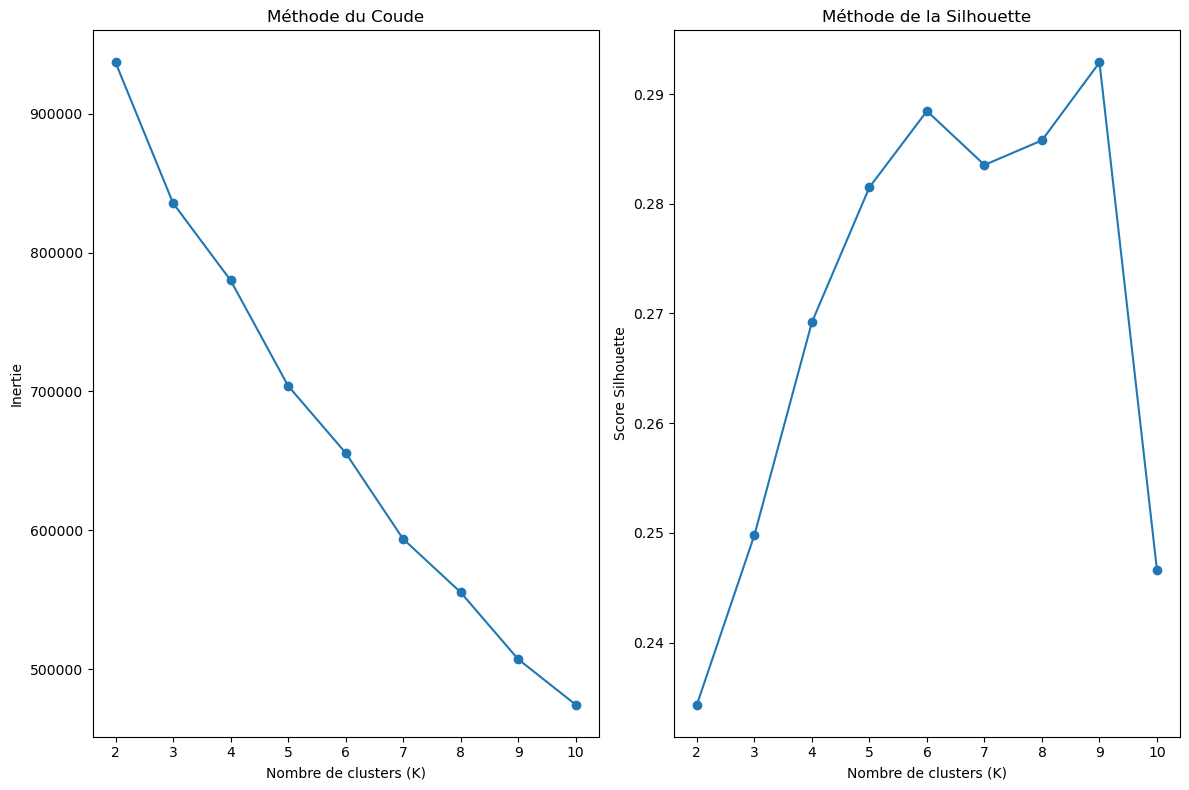

In [54]:
# Recherche du meilleur nombre de clusters : 
fct_projet_5.best_k_KMeans(data=X)

Ici : 
- La méthode de la silouhette donne un nombre de clusters de 9 
- la méthode du coude est moins franche.

Choix de K = 7.

In [55]:
# Calculs des métriques pour le modèle : 
params={'n_clusters' : 7, 'random_state' : 42}

models_FE2 = fct_projet_5.performances_modèle(
    dico=models_FE3,
    model="KMeans",
    params=params,
    data=X,
)

del params

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

### 5.3. <a id='toc5_3_'></a>[Enregistrement des modèles](#toc0_)

In [56]:
# Enregistrement du dictionnaire models_FE2 : 
name = 'models_FE3'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(models_FE3, f)
    
del name, chemin_fichier

### 5.4. <a id='toc5_4_'></a>[Résultats](#toc0_)
#### 5.4.1. <a id='toc5_4_1_'></a>[Comparaisons des modèles](#toc0_)

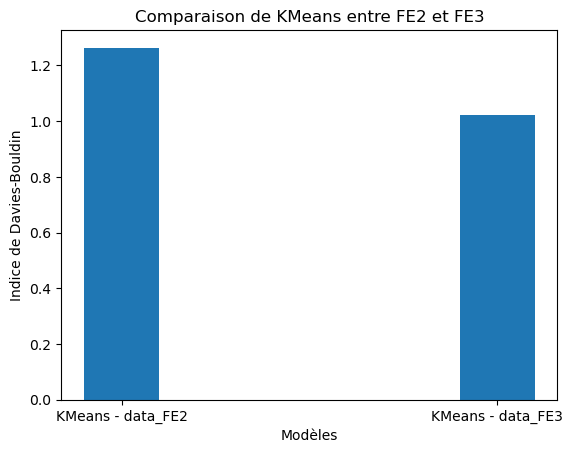

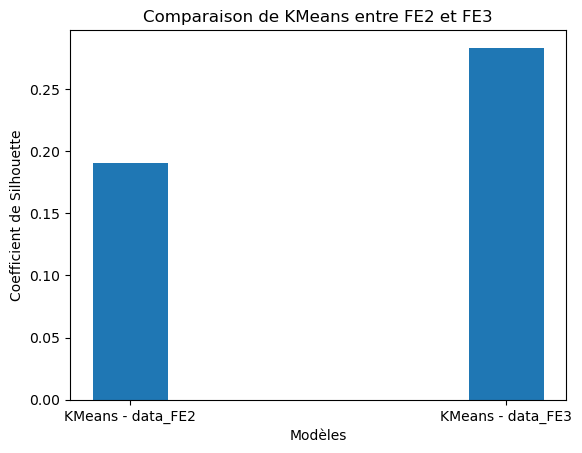

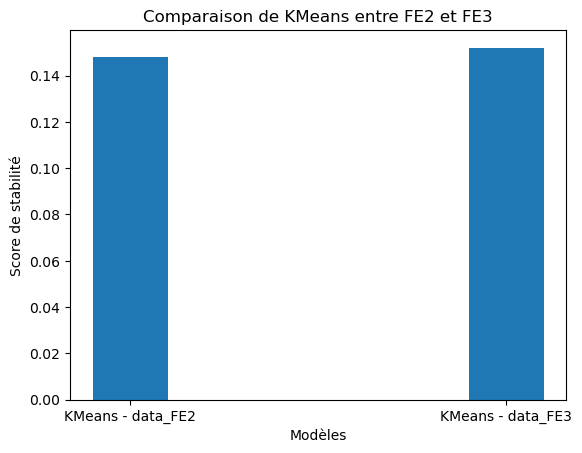

In [57]:
# Comparaison des modèles KMeans avec et sans les variables catégorielles : 

# Importation de models_FE2 : 
name = 'models_FE2'
chemin_fichier = f"/Users/maxime/Formation Data Scientist /Projets /5 - Segmentez des clients d'un site e-commerce/1. Données de travail/2. Enregistrements/{name}.pickle"
with open(chemin_fichier, 'rb') as fichier:
    models_FE2 = pickle.load(fichier)
    
del name, chemin_fichier

# Création des données : 

ls_db = [
    models_FE2['KMeans']['Davies-Bouldin'],
    models_FE3['KMeans']['Davies-Bouldin'],
        ]

ls_silhouette = [
    models_FE2['KMeans']['Silhouette'],
    models_FE3['KMeans']['Silhouette'],
]

ls_stabilite = [
    models_FE2['KMeans']['Score stabilité'],
    models_FE3['KMeans']['Score stabilité'],
]

ls_name = [
    'KMeans - data_FE2',
    'KMeans - data_FE3',
]

width = 0.2

# Graph 1 - Indice Davies-Bouldin : 

plt.figure()
plt.bar(x=ls_name, height=ls_db, width=width)
plt.xlabel('Modèles')
plt.ylabel('Indice de Davies-Bouldin')
plt.title('Comparaison de KMeans entre FE2 et FE3')
plt.show()

# Graph 2 - Silhouette : 

plt.figure()
plt.bar(x=ls_name, height=ls_silhouette, width=width)
plt.xlabel('Modèles')
plt.ylabel('Coefficient de Silhouette')
plt.title('Comparaison de KMeans entre FE2 et FE3')
plt.show()

# Graph 3 - Score Stabilité : 

plt.figure()
plt.bar(x=ls_name, height=ls_stabilite, width=width)
plt.xlabel('Modèles')
plt.ylabel('Score de stabilité')
plt.title('Comparaison de KMeans entre FE2 et FE3')
plt.show()

del ls_db, ls_name, ls_silhouette, ls_stabilite, models_FE2

Le modèles KMeans pour le FE3 semble meilleur selon les indices. 

#### 5.4.2. <a id='toc5_4_2_'></a>[Visualisation des clusters](#toc0_)

In [58]:
# Création des labels pour chaque modèle : 

for key in models_FE3.keys():
    if key == 'AC':
        data_FE3[key+'_labels'] = fct_projet_5.clustersing_with_AC(sample=X_sampled, data_full=X, key=key, dico=models_FE3)
    else: 
        data_FE3[key+'_labels'] = models_FE3[key]['model'].fit_predict(X)

del key

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Les deux composantes obtenues par la méthode PCA permettent d'expliquer 33.0369 % de la variance du datasets.


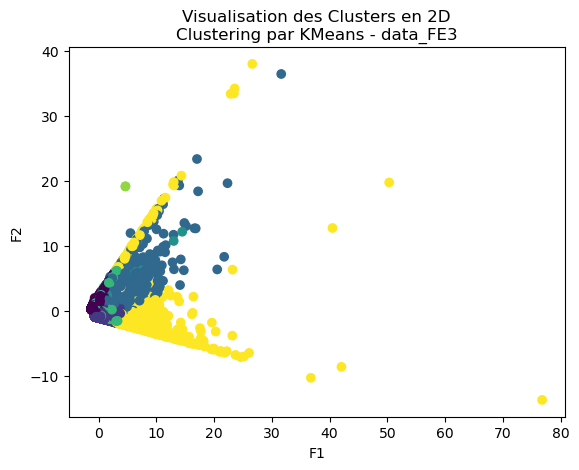

In [59]:
# Visualisation des clusters en 2 dimmensions (projection PCA): 

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=2)
data_FE3_pca = X.copy()
data_FE3_pca = pca.fit_transform(data_FE3_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les deux composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")

for key in models_FE3.keys():
    plt.figure()
    plt.scatter(data_FE3_pca[:, 0], data_FE3_pca[:, 1], c=data_FE3[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_FE3')
    plt.show()
    
del pca, data_FE3_pca, explained_variance, key

Les trois composantes obtenues par la méthode PCA permettent d'expliquer 43.9627 % de la variance du datasets.


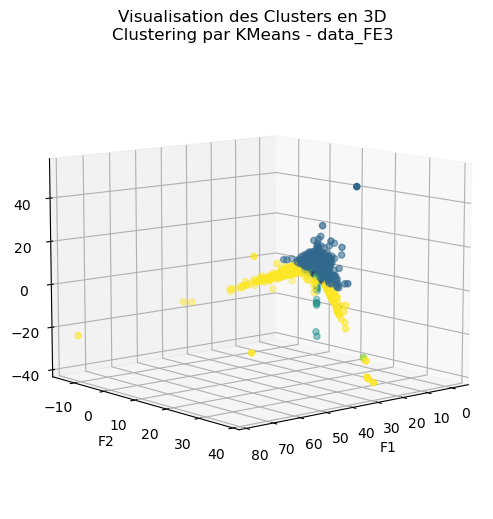

In [60]:
# Visualisation des clusters en 3 dimmensions (projection PCA): 

# %matplotlib notebook

# Création d'un data_RFMS_pca avec 2 composantes : 
pca = PCA(n_components=3)
data_FE3_pca = X.copy()
data_FE3_pca = pca.fit_transform(data_FE3_pca)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Affichage des des résultats : 
print(f"Les trois composantes obtenues par la méthode PCA permettent "
      f"d'expliquer {explained_variance.max()*100:.4f} % de la variance du datasets.")



for key in models_FE3.keys():
    
    fig = plt.figure(figsize=(10, 6))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_FE3_pca[:, 0], data_FE3_pca[:, 1], data_FE3_pca[:, 2], c=data_FE3[key+'_labels'])

    ax.set_xlabel('F1')
    ax.set_ylabel('F2')
    ax.set_zlabel('F3')
    plt.title('Visualisation des Clusters en 3D\n'
              f'Clustering par {key} - data_FE3')
    ax.view_init(azim=50, elev=10)
    
    plt.show()
    

# %matplotlib inline

del pca, data_FE3_pca, explained_variance, key

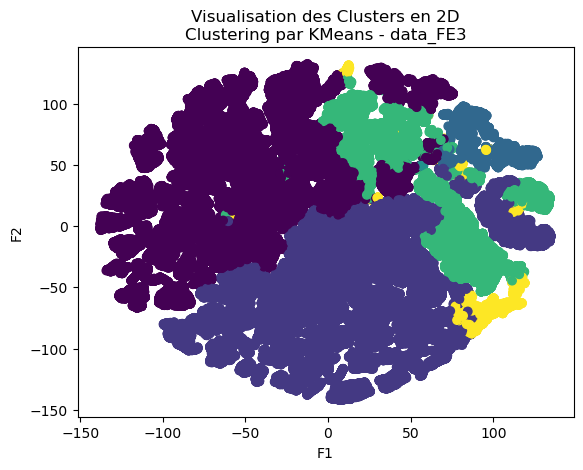

In [61]:
# Visualisation des clusters en 2 dimmensions (projection t-SNE): 

# Création d'un data_RFMS_tsne avec 2 composantes : 
tsne = TSNE(n_components=2, random_state=42)
data_RF3_tsne = X.copy()
data_RF3_tsne = tsne.fit_transform(data_RF3_tsne)


# Vous pouvez également ajouter d'autres informations à tsne_df si nécessaire, comme des étiquettes, des identifiants, etc.

for key in models_FE3.keys():
    plt.figure()
    plt.scatter(data_RF3_tsne[:, 0], data_RF3_tsne[:, 1], c=data_FE3[key+'_labels'])
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Visualisation des Clusters en 2D\n'
              f'Clustering par {key} - data_FE3')
    plt.show()
    
del tsne, data_RF3_tsne, key

### 5.5. <a id='toc5_5_'></a>[Visualisation de la répartition des clusters](#toc0_)

In [62]:
# Satistiques descriptives : 

dico = {}
numerical_col = make_column_selector(dtype_include=np.number)
categorial_col = make_column_selector(dtype_exclude=np.number)

for col in data_FE3[numerical_col].columns:
    dico[col] = ['mean', 'std', 'median']
for col in data_FE3[categorial_col].columns:
    dico[col] = 'first'

cluster_stats = {}   
    
for key in models_FE3.keys():
    cluster_stats[key] = data_FE3.groupby(key+'_labels').agg(dico)
    
for key in cluster_stats.keys():
    print(f"Statistiques descriptives des clusters créés par {key} : ")
    display(cluster_stats[key])
    print('--'*50+'\n')
    
del dico, col, cluster_stats, numerical_col, categorial_col

Statistiques descriptives des clusters créés par KMeans : 


recence                    frequence                   \
                     mean         std median      mean       std median   
KMeans_labels                                                             
0              281.914840  153.526268  263.0  1.000000  0.000000    1.0   
1              292.493272  155.203255  276.0  1.000000  0.000000    1.0   
2              270.005162  146.316080  249.0  2.000911  0.597940    2.0   
3              102.933333   40.141932   97.0  1.033333  0.182574    1.0   
4              294.675068  147.093113  269.0  1.000000  0.000000    1.0   
5              580.500000    0.707107  580.5  1.000000  0.000000    1.0   
6              294.025128  161.094403  272.0  1.024103  0.166248    1.0   

                   montant                      satisfaction  ...  \
                      mean         std   median         mean  ...   
KMeans_labels                                                 ...   
0               107.171253  100.319561    77.29     4.579984  ...   
1               161.210929  120.098038   128.95     4.570149  ...   
2               305.140416  244.053871   233.49     4.028242  ...   
3              1454.954667  956.174824  1019.62     4.100000  ...   
4               154.989159  131.689375   114.76     1.231759  ...   
5                87.670000    4.270925    87.67     1.000000  ...   
6              1279.493144  743.246024  1057.30     3.920513  ...   

              payment_installments_mode number_of_product_tot            \
                                 median                  mean       std   
KMeans_labels                                                             
0                                   0.0              1.081133  0.324614   
1                                   1.0              1.101449  0.362420   
2                                   1.0              2.912845  1.738527   
3                                   0.0              1.066667  0.253708   
4                                   1.0              1.240766  0.586808   
5                                   0.0              1.000000  0.000000   
6                                   1.0              1.388718  1.175985   

                     temps_expedition_moy                   KMeans_labels  \
              median                 mean       std  median          mean   
KMeans_labels                                                               
0                1.0             6.448850  3.023816     6.0           0.0   
1                1.0             6.166491  3.109983     6.0           1.0   
2                2.0             6.885198  9.508994     6.0           2.0   
3                1.0             7.366667  4.559820     6.0           3.0   
4                1.0             6.723055  3.878341     6.0           4.0   
5                1.0          1056.000000  0.000000  1056.0           5.0   
6                1.0             7.109188  3.894864     6.0           6.0   

                           
               std median  
KMeans_labels              
0              0.0    0.0  
1              0.0    1.0  
2              0.0    2.0  
3              0.0    3.0  
4              0.0    4.0  
5              0.0    5.0  
6              0.0    6.0  

[7 rows x 36 columns]

----------------------------------------------------------------------------------------------------



Répartition des variables par clusters créés par KMeans :



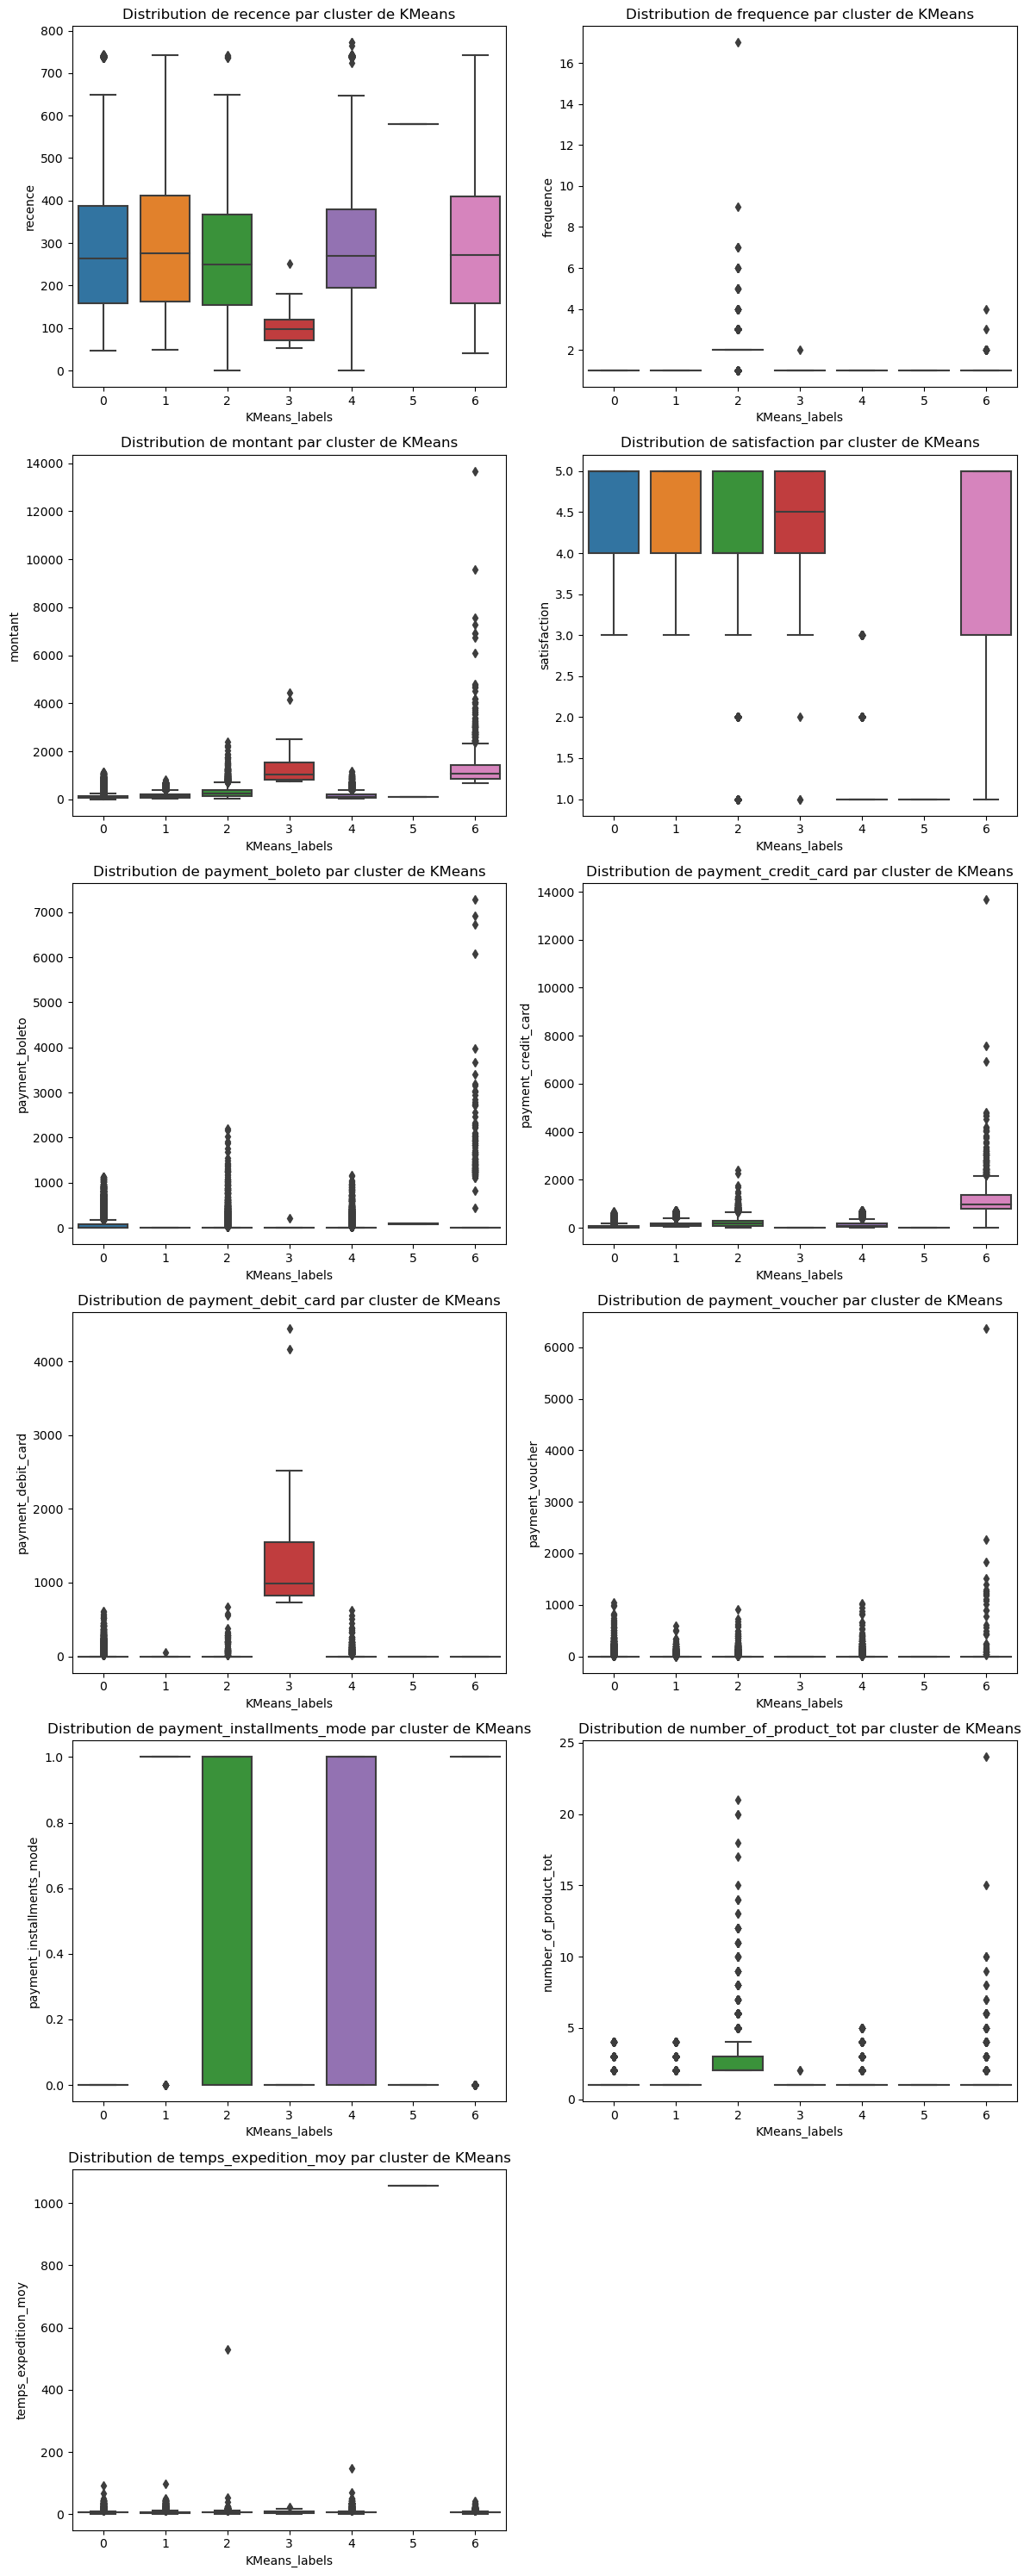


----------------------------------------------------------------------------------------------------


In [63]:
# Visualisation de la répartition des variables par clusters : 

# Création de la liste des colonnes de variables : 
last_col = data_FE3.shape[1] - len(models_FE3)
ls_col = [col for col in data_FE3.iloc[:, :last_col].columns]

# Sélection des variables categorielles : 
categorical_cols = data_FE3.select_dtypes(include=['object']).columns

# Création du nombre de lignes de subplot : 
num_rows = (len(ls_col) + 1) // 2 

# Création des graphiques : 
for key in models_FE3.keys(): 
    print(f"Répartition des variables par clusters créés par {key} :\n")

    plt.figure(figsize=(12, 5 * num_rows)) 
    
    for i, col in enumerate(ls_col, 1):
        label = key + '_labels'
        ls = [col, label]

        # Création d'une grille de sous graphique de dimenssions (num_rows x 2) :
        plt.subplot(num_rows, 2, i)
        
        if col in categorical_cols:
            cat_freq = data_FE3.groupby([label, col]).size().unstack(fill_value=0)
            cat_freq = cat_freq.divide(cat_freq.sum(axis=1), axis=0)
            cat_freq = cat_freq.sort_values(by=label, ascending=True)

            # Création du graphique en barres empilées
            cat_freq.plot(kind='bar', stacked=True, ax=plt.gca())
            plt.title(f'Distribution de {col} par cluster de {key}')
            
            #sns.countplot(x=label, hue=col, data=data_FE2)
            #plt.title(f'Distribution de {col} par cluster de {key}')
        else:
            sns.boxplot(x=label, y=col, data=data_FE3)
            plt.title(f'Distribution de {col} par cluster de {key}')

    plt.tight_layout()  
    plt.show()
    
    print('\n'+'--'*50)
    
del ls_col, num_rows, key, i, col, label, ls, last_col, categorical_cols

Interprétation des clusters : 


- Cluster 0 : "Modérés Satisfaits"
    - Segment : Clients récemment actifs, dépensant de manière modérée, sans préférence particulière pour l'échelonnement des paiements.
    - Actions Marketing : Offrir des promotions saisonnières pour encourager des dépenses légèrement plus élevées, des recommandations de produits basées sur leurs achats précédents.
- Cluster 1 : "Planificateurs Prudents"
    - Segment : Clients récemment actifs, dépensant de manière modérée, qui préfèrent l'échelonnement des paiements.
    - Actions Marketing : Proposer des options de paiement échelonné flexibles, des remises pour paiement anticipé, ou des avantages pour les achats récurrents.
- Cluster 2 : "Fidèles Actifs"
    - Segment : Clients régulièrement actifs, commandant fréquemment, avec une préférence modérée pour l'échelonnement des paiements.
     -Actions Marketing : Lancer un programme de fidélité avec des récompenses pour les clients réguliers, des offres exclusives pour les commandes fréquentes.
- Cluster 3 : "Gros Dépensiers récents"
    - Segment : Clients récents dépensant beaucoup, très satisfaits, utilisant des cartes de débit et évitant l'échelonnement des paiements.
    - Actions Marketing : Offrir des avantages exclusifs liés à l'utilisation de cartes de débit, des remises pour des achats importants et des incitations à dépenser davantage.
- Cluster 4 : "Insatisfaits en Attente"
    - Segment : Clients récemment actifs, insatisfaits, ouverts à l'échelonnement des paiements.
    - Actions Marketing : Travailler sur l'amélioration de leur expérience, solliciter leurs commentaires, et proposer des options de paiement échelonné pour les fidéliser.
- Cluster 5 : "Inactifs Insatisfaits"
    - Segment : Clients très inactifs, insatisfaits, n'utilisant pas l'échelonnement des paiements.
    - Actions Marketing : Réactiver ces clients avec des offres spéciales personnalisées, des remises attrayantes, et des enquêtes pour comprendre et résoudre leur insatisfaction.
- Cluster 6 : "Dépensiers Flexibles"
    - Segment : Clients récemment actifs, dépensant beaucoup, satisfaction moyenne, utilisant des cartes de crédit et préférant l'échelonnement des paiements.
    - Actions Marketing : Proposer des options de paiement échelonné flexibles, des remises sur les cartes de crédit, ou des avantages liés au paiement électronique pour les encourager à dépenser davantage.